# Importación de bases y trabajo pre exploratorio

In [130]:
import pandas as pd

# Definir el path donde se encuentran los archivos
path = 'C:/Users/Andy/OneDrive/Desktop/MCD/Datathon/'

# Especificar los paths completos para cada archivo
path_ventas = path + 'VentasPR.xlsx'
path_promociones = path + 'ProdEnPromo-UM.xls'
path_productos = path + 'Producto-UM.xls'

# Cargar los archivos
ventas = pd.read_excel(path_ventas)
promociones = pd.read_excel(path_promociones, engine='xlrd')
productos = pd.read_excel(path_productos, engine='xlrd')

In [131]:
print("Ventas:")
print(ventas.head())
print(ventas.info())

Ventas:
   LOCCOD    MOVFEC  PRDCODEXT  ACPRCANTVEND ACPRIMPVEN
0    5201  2/5/2021     600790             7       1393
1    5201  2/5/2021     600793             2        390
2    5201  2/5/2021     600794             7       2023
3    5201  2/5/2021     605089             1        399
4    5201  2/5/2021     605097             1        565
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145276 entries, 0 to 145275
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   LOCCOD        145276 non-null  int64 
 1   MOVFEC        145276 non-null  object
 2   PRDCODEXT     145276 non-null  int64 
 3   ACPRCANTVEND  145276 non-null  int64 
 4   ACPRIMPVEN    145276 non-null  object
dtypes: int64(3), object(2)
memory usage: 5.5+ MB
None


In [132]:
print("\nPromociones:")
print(promociones.head())
print(promociones.info())


Promociones:
   PRDCODEXT PROMDEFFECDES PROMDEFFECHAS
0     560226    2023-02-13    2023-02-26
1     560227    2023-02-13    2023-02-26
2     561875    2023-02-13    2023-02-26
3     561895    2023-02-13    2023-02-26
4     561899    2023-02-13    2023-02-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRDCODEXT      1694 non-null   int64         
 1   PROMDEFFECDES  1694 non-null   datetime64[ns]
 2   PROMDEFFECHAS  1694 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 39.8 KB
None


In [133]:
print("\nProductos:")
print(productos.head())
print(productos.info())


Productos:
      Cod  Status Hoy   Prov  Cat   Tipo Prov
0  561699           5  68952   216          1
1  561634           5  68952   216          1
2  561694           5  68952   216          1
3  561826           5  68952   216          1
4  561891           5  68952   216          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Cod         2084 non-null   int64
 1   Status Hoy  2084 non-null   int64
 2   Prov        2084 non-null   int64
 3   Cat         2084 non-null   int64
 4   Tipo Prov   2084 non-null   int64
dtypes: int64(5)
memory usage: 81.5 KB
None


In [134]:
# Renombrar columnas en el dataframe de ventas
ventas.rename(columns={
    'LOCCOD': 'LocalID',
    'MOVFEC': 'Fecha',
    'PRDCODEXT': 'ProductoID',
    'ACPRCANTVEND': 'CantidadVendida',
    'ACPRIMPVEN': 'ImporteVendido'
}, inplace=True)

# Renombrar columnas en el dataframe de promociones
promociones.rename(columns={
    'PRDCODEXT': 'ProductoID',
    'PROMDEFFECDES': 'InicioPromocion',
    'PROMDEFFECHAS': 'FinPromocion'
}, inplace=True)

# Renombrar columnas en el dataframe de características del producto
productos.rename(columns={
    'Cod': 'ProductoID',
    'Status Hoy': 'Status',
    'Prov': 'ProveedorID',
    'Cat ': 'Categoria', # La variable 'Cat ' tiene un espacio al final
    'Tipo Prov': 'TipoProveedor'
}, inplace=True)

In [135]:
# Convertir ProductoID a string en todos los dataframes
ventas['ProductoID'] = ventas['ProductoID'].astype(str)
promociones['ProductoID'] = promociones['ProductoID'].astype(str)
productos['ProductoID'] = productos['ProductoID'].astype(str)

# Convertir la columna de fecha a tipo datetime en el dataframe de ventas
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'], format='%d/%m/%Y')

# Convertir las columnas de fecha en el dataframe de promociones a tipo datetime
promociones['InicioPromocion'] = pd.to_datetime(promociones['InicioPromocion'])
promociones['FinPromocion'] = pd.to_datetime(promociones['FinPromocion'])

# Convertir la columna de importe a tipo numérico en el dataframe de ventas cambio de ',' a '.'
ventas['ImporteVendido'] = ventas['ImporteVendido'].str.replace(',', '.')
ventas['ImporteVendido'] = pd.to_numeric(ventas['ImporteVendido'], errors='coerce')

# Transformar Status en una variable dummy que indique si el producto está inactivo
productos['Inactivo'] = productos['Status'].apply(lambda x: 1 if x == 5 else 0)

# Transformar Categoria en una variable dummy Cat217 que valga 1 si la categoría es 217 y 0 si es 216
productos['Cat217'] = productos['Categoria'].apply(lambda x: 1 if x == 217 else 0)

# Convertir ProveedorID a string en el dataframe de productos
productos['ProveedorID'] = productos['ProveedorID'].astype(str)

In [136]:
# Calcular el número de fechas
fecha_min = ventas['Fecha'].min()
fecha_max = ventas['Fecha'].max()

# Crear un rango completo de fechas desde la fecha mínima hasta la fecha máxima en el conjunto de datos
fechas = pd.date_range(start=fecha_min, end=fecha_max)

# Calcular el número de productos
productos_unicos = ventas['ProductoID'].unique()

# Crear una combinación completa de todas las fechas y todos los productos
combinacion_completa = pd.MultiIndex.from_product([fechas, productos_unicos], names=['Fecha', 'ProductoID'])

# Convertir a DataFrame
combinacion_completa_df = pd.DataFrame(index=combinacion_completa).reset_index()

# Fusionar esta combinación completa con el conjunto de datos original de ventas
ventas_completa = combinacion_completa_df.merge(ventas, on=['Fecha', 'ProductoID'], how='left')

# Rellenar con ceros donde no había ventas
ventas_completa['CantidadVendida'].fillna(0, inplace=True)
ventas_completa['ImporteVendido'].fillna(0, inplace=True)

In [137]:
# Crear un DataFrame expandido para promociones
promociones_expandidas = []
for idx, row in promociones.iterrows():
    for single_date in pd.date_range(row['InicioPromocion'], row['FinPromocion']):
        promociones_expandidas.append([row['ProductoID'], single_date])

promociones_expandidas = pd.DataFrame(promociones_expandidas, columns=['ProductoID', 'Fecha'])

# Listo los ID de productos que tienen más de una observación con la misma fecha
promociones_expandidas_d = promociones_expandidas[promociones_expandidas.duplicated(subset=['Fecha', 'ProductoID'], keep=False)]['ProductoID'].unique()
print(f'Hay {len(promociones_expandidas_d)} productos con más de una observación en la misma fecha')

# Eliminar duplicados
promociones_expandidas = promociones_expandidas.drop_duplicates()

Hay 70 productos con más de una observación en la misma fecha


Al visualizar que había 70 productos con más de una promoción para una misma fecha en la tabla de "Promociones", para evitar duplicados al mergear las tablas "Ventas" y "Promociones",
procedimos a eliminar los duplicados. 

In [138]:
# Listo los ID de productos que tienen más de una observación con la misma fecha
promociones_expandidas_d = promociones_expandidas[promociones_expandidas.duplicated(subset=['Fecha', 'ProductoID'], keep=False)]['ProductoID'].unique()
print(f'Hay {len(promociones_expandidas_d)} productos con más de una observación en la misma fecha')

Hay 0 productos con más de una observación en la misma fecha


In [139]:
# Merge con la tabla de ventas completa
ventas_completa = ventas_completa.merge(promociones_expandidas, on=['Fecha', 'ProductoID'], how='left', indicator=True)

# Crear una columna para indicar si la venta fue durante una promoción
ventas_completa['EnPromocion'] = ventas_completa['_merge'] == 'both'
ventas_completa.drop(columns=['_merge'], inplace=True)

# Resultado final
ventas_completa.head()

,Fecha,ProductoID,LocalID,CantidadVendida,ImporteVendido,EnPromocion
0,2021-05-02,600790,5201.0,7.0,1393.0,False
1,2021-05-02,600793,5201.0,2.0,390.0,False
2,2021-05-02,600794,5201.0,7.0,2023.0,False
3,2021-05-02,605089,5201.0,1.0,399.0,False
4,2021-05-02,605097,5201.0,1.0,565.0,False


In [140]:
# Listo los ID de productos que tienen más de una observación con la misma fecha
productos_duplicados = ventas_completa[ventas_completa.duplicated(subset=['Fecha', 'ProductoID'], keep=False)]['ProductoID'].unique()
print(f'Hay {len(productos_duplicados)} productos con más de una observación en la misma fecha')

# Exporto los registros duplicados a un archivo CSV
ventas_completa[ventas_completa.duplicated(subset=['Fecha', 'ProductoID'], keep=False)].to_csv(path + 'Duplicados.csv', index=False)

Hay 0 productos con más de una observación en la misma fecha


In [141]:
# Mergeo con el dataframe de productos trayendo solo la información de Inactivo, Cat217 TipoProveedor y ProveedorID
ventas_completa = ventas_completa.merge(productos[['ProductoID', 'Inactivo', 'Cat217', 'TipoProveedor', 'ProveedorID']], on='ProductoID', how='left')

# Completo la variable Local para las observaciones que no tienen información
ventas_completa['LocalID'] = 5201

# Verificar el resultado del merge
ventas_completa.head()

,Fecha,ProductoID,LocalID,CantidadVendida,ImporteVendido,EnPromocion,Inactivo,Cat217,TipoProveedor,ProveedorID
0,2021-05-02,600790,5201,7.0,1393.0,False,0.0,0.0,1.0,31064
1,2021-05-02,600793,5201,2.0,390.0,False,0.0,0.0,1.0,31064
2,2021-05-02,600794,5201,7.0,2023.0,False,0.0,0.0,1.0,31064
3,2021-05-02,605089,5201,1.0,399.0,False,0.0,0.0,1.0,22010
4,2021-05-02,605097,5201,1.0,565.0,False,1.0,0.0,1.0,10145


In [142]:
# Cuento los productos faltantes en el df de productos
productos_faltantes = ventas_completa[ventas_completa['Inactivo'].isnull()]['ProductoID'].unique()
print(f'Hay {len(productos_faltantes)} productos faltantes en el dataframe de productos')

# Cuento las observaciones con datos faltantes en la columna de Inactivo
observaciones_faltantes = ventas_completa[ventas_completa['Inactivo'].isnull()].shape[0]
print(f'Hay {observaciones_faltantes} observaciones con datos faltantes en la columna de Inactivo')

Hay 33 productos faltantes en el dataframe de productos
Hay 36135 observaciones con datos faltantes en la columna de Inactivo


In [143]:
# Elimino las observaciones con productos faltantes
ventas_completa = ventas_completa[~ventas_completa['Inactivo'].isnull()]

In [144]:
# Transformo los tipos de variable a su forma correcta

ventas_completa['ProductoID'] = ventas_completa['ProductoID'].astype(str)
ventas_completa['ProveedorID'] = ventas_completa['ProveedorID'].astype(str)
ventas_completa['LocalID'] = ventas_completa['LocalID'].astype(str)
ventas_completa['CantidadVendida'] = ventas_completa['CantidadVendida'].astype(int)
ventas_completa['Inactivo'] = ventas_completa['Inactivo'].astype(bool)
ventas_completa['Cat217'] = ventas_completa['Cat217'].astype(bool)

In [145]:
ventas_completa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1619505 entries, 0 to 1655639
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Fecha            1619505 non-null  datetime64[ns]
 1   ProductoID       1619505 non-null  object        
 2   LocalID          1619505 non-null  object        
 3   CantidadVendida  1619505 non-null  int32         
 4   ImporteVendido   1619505 non-null  float64       
 5   EnPromocion      1619505 non-null  bool          
 6   Inactivo         1619505 non-null  bool          
 7   Cat217           1619505 non-null  bool          
 8   TipoProveedor    1619505 non-null  float64       
 9   ProveedorID      1619505 non-null  object        
dtypes: bool(3), datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 97.3+ MB


In [146]:
# Dropeo las columnas LocalID y TipoProveedor que no aportan información
ventas_completa.drop(columns=['LocalID', 'TipoProveedor'], inplace=True)

In [147]:
# Condición adicional para el rango de fechas específico ("Salón del vino")
fecha_inicio = pd.to_datetime('2022-05-25')
fecha_fin = pd.to_datetime('2022-06-13')
mask_additional = (ventas_completa['Fecha'] >= fecha_inicio) & (ventas_completa['Fecha'] <= fecha_fin)
ventas_completa.loc[mask_additional, 'EnPromocion'] = 1

Al visualizar las ventas observamos que grandes volúmenes de las mismas en fechas específicas están relacionados con eventos especiales, como ser el "Salón del Vino". Sin embargo, nos llamó la atención de que uno de esos incrementos de ventas, no estaban etiquetados como promoción. Al indagar sobre el perdíodo de tiempo correspondiente, notamos que coincidía con el "Salón del Vino" que tuvo lugar entre fines de mayo y principios de junio de 2022. Por lo tanto, etiquetamos estas ventas como “con promo”, con el fin de realizar predicciones que se ajusten mejor a la realidad.

# Análisis exploratorio

In [148]:
import sweetviz as sv

# Crear un reporte de análisis exploratorio
report = sv.analyze(ventas_completa)

# Guardar el reporte en un archivo HTML
report.show_html('reporte.html')

                                             |          | [  0%]   00:00 -> (? left)

Report reporte.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


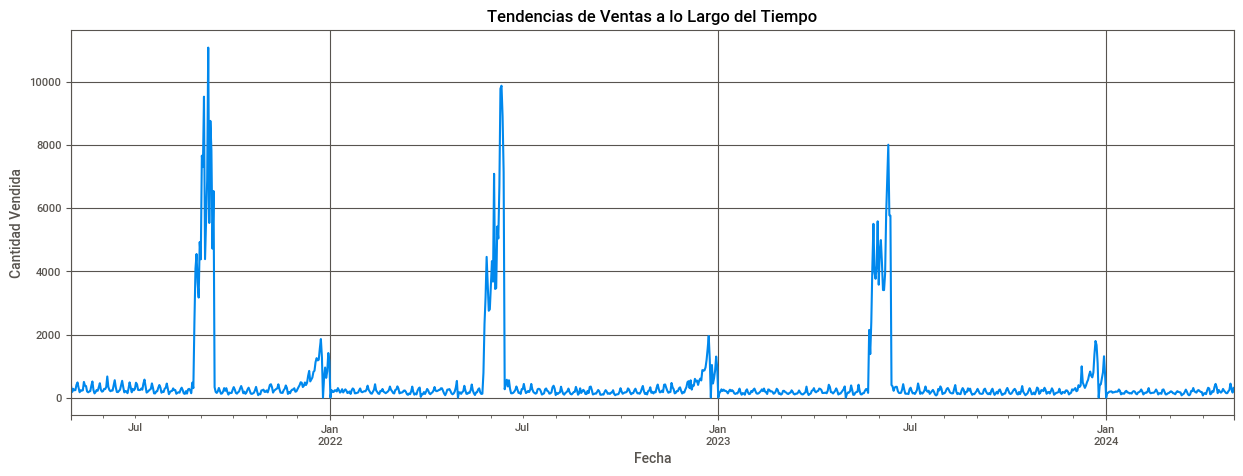

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tendencias de ventas a lo largo del tiempo
plt.figure(figsize=(15, 5))
ventas_completa.groupby('Fecha')['CantidadVendida'].sum().plot()
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()

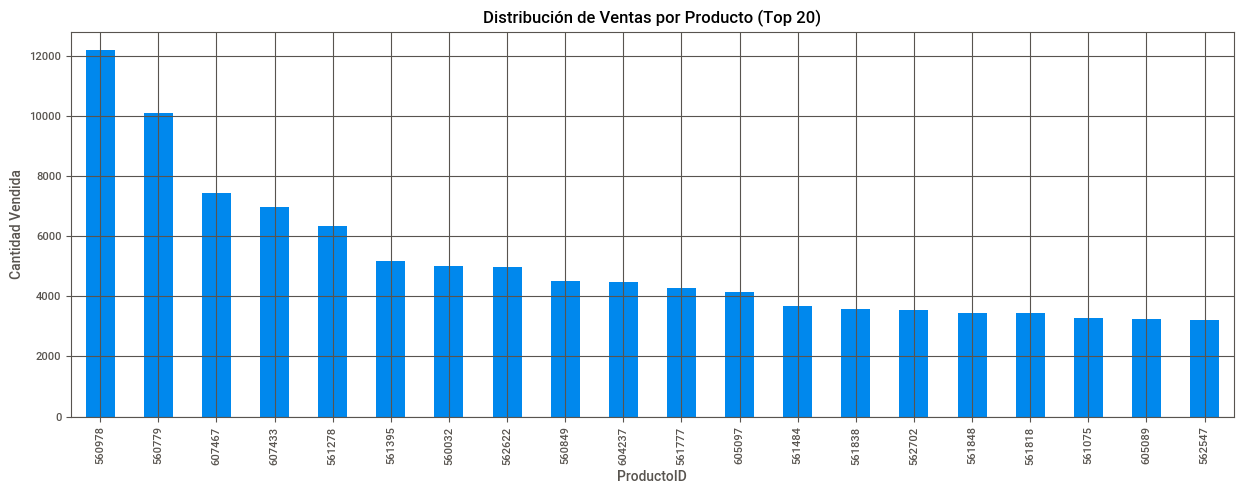

In [150]:
# Distribución de ventas por producto
plt.figure(figsize=(15, 5))
ventas_completa.groupby('ProductoID')['CantidadVendida'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Distribución de Ventas por Producto (Top 20)')
plt.xlabel('ProductoID')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()

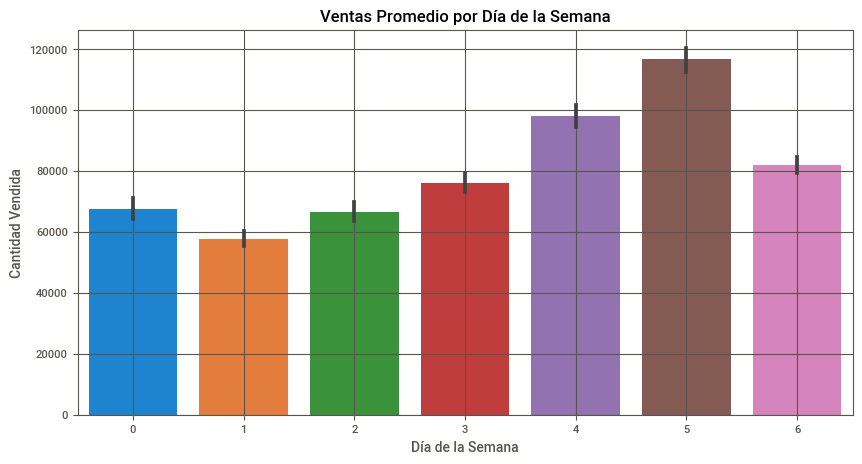

In [151]:
# Crear columna del día de la semana
ventas_completa['DiaSemana'] = ventas_completa['Fecha'].dt.dayofweek

# Ventas promedio por día de la semana
plt.figure(figsize=(10, 5))
sns.barplot(data=ventas_completa, x='DiaSemana', y='CantidadVendida', estimator=sum)
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()

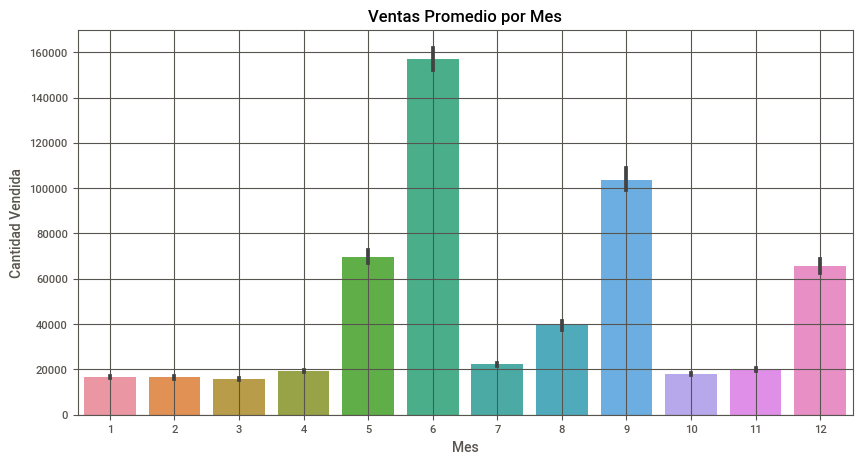

In [152]:
# Crear columna del mes
ventas_completa['Mes'] = ventas_completa['Fecha'].dt.month

# Ventas promedio por mes
plt.figure(figsize=(10, 5))
sns.barplot(data=ventas_completa, x='Mes', y='CantidadVendida', estimator=sum)
plt.title('Ventas Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()

In [153]:
# Crear columna del AñoMes que se componga de YYYYMM
ventas_completa['AnioMes'] = ventas_completa['Fecha'].dt.strftime('%Y%m')

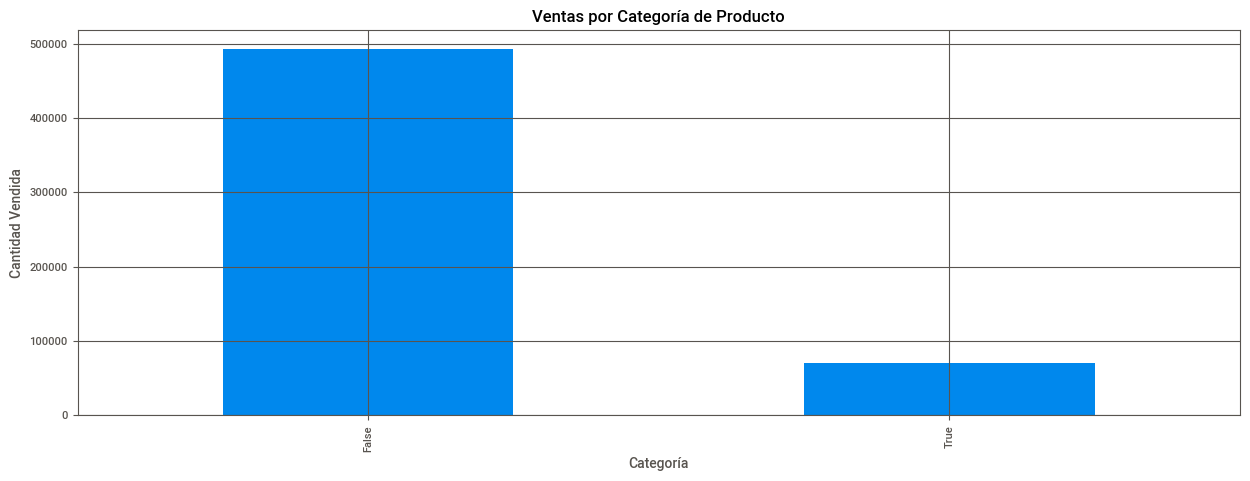

In [154]:
# Análisis de ventas por categoría de producto
plt.figure(figsize=(15, 5))
ventas_completa.groupby('Cat217')['CantidadVendida'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Ventas por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()

# Modelado y entrenamiento

In [155]:
# Dropeo todas las observaciones donde 'Inactivo" es True
ventas_completa = ventas_completa[~ventas_completa['Inactivo']]

In [156]:
from joblib import Parallel, delayed
import numpy as np

# Creamos una columna que marque si se trata de un outlier o no en la cantidad vendida del producto
ventas_completa['Outlier'] = 0

def detectar_outliers_por_producto(producto):
    outlier_indices = []
    # Creamos una máscara para el producto actual
    mask_producto = ventas_completa['ProductoID'] == producto
    for mes in ventas_completa.loc[mask_producto, 'AnioMes'].unique():
        # Creamos una máscara para el mes y producto actual
        mask = mask_producto & (ventas_completa['AnioMes'] == mes)
        # Calculamos la media de la cantidad vendida de ese mes y producto, excluyendo los días con cantidad vendida igual a 0
        media = ventas_completa.loc[mask & (ventas_completa['CantidadVendida'] != 0), 'CantidadVendida'].mean()
        # Identificamos los índices que son outliers
        outliers = ventas_completa.loc[mask & ((ventas_completa['CantidadVendida'] > 10 * media) | 
                                               (ventas_completa['CantidadVendida'] < media / 10))].index
        outlier_indices.extend(outliers)
    return outlier_indices

# Lista de productos
productos = ventas_completa['ProductoID'].unique()

# Paralelizamos el proceso
resultados = Parallel(n_jobs=-1)(delayed(detectar_outliers_por_producto)(producto) for producto in productos)

# Actualizamos la columna 'Outlier' en el DataFrame original
for indices in resultados:
    ventas_completa.loc[indices, 'Outlier'] = 1

In [157]:
# Cuento total de outliers
total_outliers = ventas_completa['Outlier'].sum()

# Calculo el porcentaje de outliers
porcentaje_outliers = total_outliers / ventas_completa.shape[0] * 100

print(f'Hay {total_outliers} outliers, lo que representa un {porcentaje_outliers:.2f}% del total de observaciones')

Hay 533200 outliers, lo que representa un 48.55% del total de observaciones


In [158]:
# Cuento la cantidad de outliers en observaciones con cantidad vendida distinta de 0
outliers = ventas_completa[(ventas_completa['CantidadVendida'] != 0) & (ventas_completa['Outlier'] == 1)].shape[0]

# Calculo el porcentaje de outliers
porcentaje_outliers = outliers / ventas_completa[ventas_completa['CantidadVendida'] != 0].shape[0] * 100

print(f'Hay {outliers} outliers en observaciones con cantidad vendida distinta de 0, lo que representa un {porcentaje_outliers:.2f}% del total')

Hay 1641 outliers en observaciones con cantidad vendida distinta de 0, lo que representa un 1.38% del total


In [159]:
# Creo una columna que indique si el producto es un outlier cuando la cantidad vendida es distinta de 0
ventas_completa['OutlierCantidad'] = (ventas_completa['CantidadVendida'] != 0) & (ventas_completa['Outlier'] == 1)

In [160]:
# Elimino todos los outliers cantidad positivos
ventas_completa = ventas_completa[~ventas_completa['OutlierCantidad']]
ventas_completa.drop(columns=['OutlierCantidad'], inplace=True)

In [161]:
# Cantidad vendida el día anterior
ventas_completa['CantidadVendidaAnterior'] = ventas_completa.groupby('ProductoID')['CantidadVendida'].transform(lambda x: x.shift(1).fillna(0))

# Cantidad vendida en los 7 días anteriores
ventas_completa['CantidadVendida7Dias'] = ventas_completa.groupby('ProductoID')['CantidadVendida'].transform(lambda x: x.shift(1).rolling(window=7, min_periods=1).sum().fillna(0))

# Cantidad vendida en los 15 días anteriores
ventas_completa['CantidadVendida15Dias'] = ventas_completa.groupby('ProductoID')['CantidadVendida'].transform(lambda x: x.shift(1).rolling(window=15, min_periods=1).sum().fillna(0))

# Crear la columna 'CantidadVendidaProximos15Dias' como la suma de las ventas de los próximos 15 días
ventas_completa['CantidadVendidaProximos15Dias'] = ventas_completa.groupby('ProductoID')['CantidadVendida'].transform(lambda x: x.shift(-1).rolling(window=15, min_periods=1).sum().fillna(0))

In [162]:
# Transformo en dummies las variables Mes y DiaSemana
ventas_completa = pd.get_dummies(ventas_completa, columns=['Mes', 'DiaSemana'], drop_first=True)

In [163]:
# Eliminar la columna 'Fecha' ya que tenemos variables dummy para el día de la semana y el mes
ventas_completa = ventas_completa.drop(columns=['Fecha'])

In [164]:
ventas_completa.head()

,ProductoID,CantidadVendida,ImporteVendido,EnPromocion,Inactivo,Cat217,ProveedorID,AnioMes,Outlier,CantidadVendidaAnterior,...,Mes_9,Mes_10,Mes_11,Mes_12,DiaSemana_1,DiaSemana_2,DiaSemana_3,DiaSemana_4,DiaSemana_5,DiaSemana_6
0,600790,7,1393.0,False,False,False,31064,202105,0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,600793,2,390.0,False,False,False,31064,202105,0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,600794,7,2023.0,False,False,False,31064,202105,0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,605089,1,399.0,False,False,False,22010,202105,0,0.0,...,False,False,False,False,False,False,False,False,False,True
5,605548,1,305.0,False,False,False,31062,202105,0,0.0,...,False,False,False,False,False,False,False,False,False,True


## Random forest

In [165]:
from sklearn.model_selection import train_test_split

# Definir las características (features) y el objetivo (target)
features = ventas_completa.drop(columns=['CantidadVendidaProximos15Dias', 'ProductoID']).columns.tolist()
target = 'CantidadVendidaProximos15Dias'

# Dividir los datos en conjuntos de entrenamiento y prueba
X = ventas_completa[features]
y = ventas_completa[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (877315, 28)
Tamaño del conjunto de prueba: (219329, 28)


In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definir el modelo con procesamiento paralelo
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluar el modelo
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MAE en entrenamiento: {mae_train}')
print(f'MSE en entrenamiento: {mse_train}')
print(f'MAE en prueba: {mae_test}')
print(f'MSE en prueba: {mse_test}')


MAE en entrenamiento: 0.38488880377449347
MSE en entrenamiento: 3.637748105643293
MAE en prueba: 0.5186396126173034
MSE en prueba: 4.504929329129021


## Regresión lineal

In [167]:
# Entrenar un modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Inicializar el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Realizar predicciones
predicciones_train = modelo.predict(X_train)
predicciones_test = modelo.predict(X_test)

# Calcular el error cuadrático medio
mse_train = mean_squared_error(y_train, predicciones_train)
mse_test = mean_squared_error(y_test, predicciones_test)

print(f'Error cuadrático medio en el conjunto de entrenamiento: {mse_train}')
print(f'Error cuadrático medio en el conjunto de prueba: {mse_test}')

Error cuadrático medio en el conjunto de entrenamiento: 23.275008794986782
Error cuadrático medio en el conjunto de prueba: 4.016422736847672


## Random forest con clustering

In [168]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_cluster = scaler.fit_transform(ventas_completa[features])

# Verificar las dimensiones de los datos escalados
print(X_cluster.shape)

(1096644, 28)


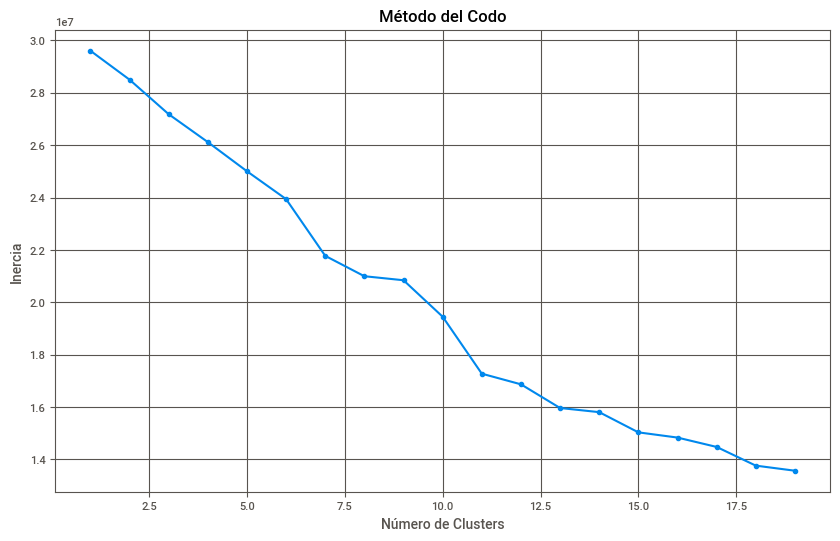

In [169]:
from sklearn.cluster import KMeans

# Método del codo para encontrar el número óptimo de clusters
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [170]:
# Elegir el número de clusters
k = 11
kmeans = KMeans(n_clusters=k, random_state=42)
ventas_completa['Cluster'] = kmeans.fit_predict(X_cluster)

# Verificar la distribución de los clusters
print(ventas_completa['Cluster'].value_counts())

c:\Users\Andy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
6     276700
2      93276
3      93267
0      93014
9      92858
4      91716
8      90262
10     88999
1      88156
5      85249
7       3147
Name: count, dtype: int64


# PCA

In [171]:
from sklearn.decomposition import PCA

# Escalar los datos
scaler = StandardScaler()
X_cluster = scaler.fit_transform(ventas_completa[features])

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
X_pca = pca.fit_transform(X_cluster)

# Verificar la varianza explicada por cada componente principal
print(f'Varianza explicada por los componentes principales: {pca.explained_variance_ratio_}')

Varianza explicada por los componentes principales: [0.1432478  0.05563788]


In [172]:
# Aplicar KMeans en el espacio de los componentes principales
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init='auto')
ventas_completa['Cluster_PCA'] = kmeans_pca.fit_predict(X_pca)

# Verificar la distribución de los clusters
print(ventas_completa['Cluster_PCA'].value_counts())

# Mostrar las primeras filas con los clusters asignados
print(ventas_completa.head())

Cluster_PCA
7     314471
0     258902
6     243493
1     243048
9      24920
3       7280
8       2832
2       1157
5        420
10       108
4         13
Name: count, dtype: int64
  ProductoID  CantidadVendida  ImporteVendido EnPromocion  Inactivo  Cat217  \
0     600790                7          1393.0       False     False   False   
1     600793                2           390.0       False     False   False   
2     600794                7          2023.0       False     False   False   
3     605089                1           399.0       False     False   False   
5     605548                1           305.0       False     False   False   

  ProveedorID AnioMes  Outlier  CantidadVendidaAnterior  ...  Mes_11  Mes_12  \
0       31064  202105        0                      0.0  ...   False   False   
1       31064  202105        0                      0.0  ...   False   False   
2       31064  202105        0                      0.0  ...   False   False   
3       22010  202105   

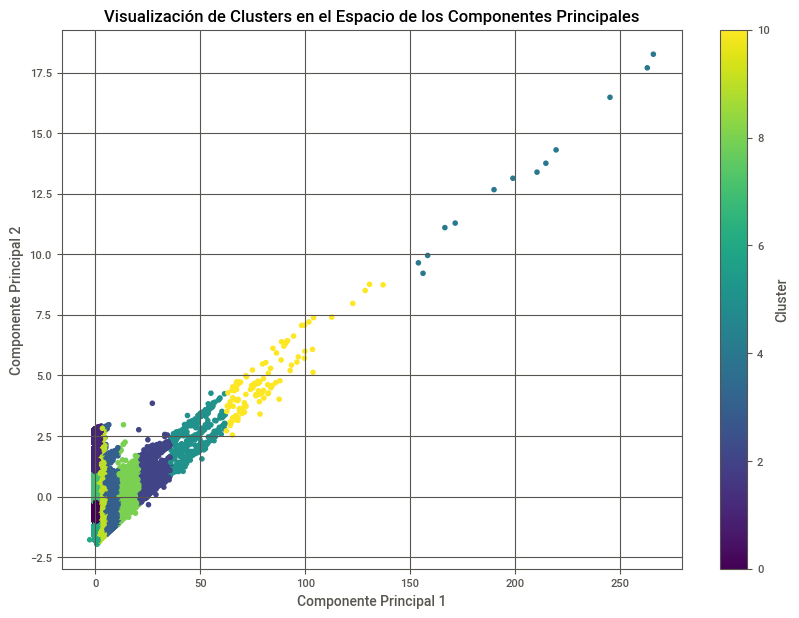

In [173]:
# Visualización de los componentes principales y los clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ventas_completa['Cluster_PCA'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters en el Espacio de los Componentes Principales')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## Forecasting

Clustering original_sin PCA

RMSE for cluster 4: 1.2333236630129718


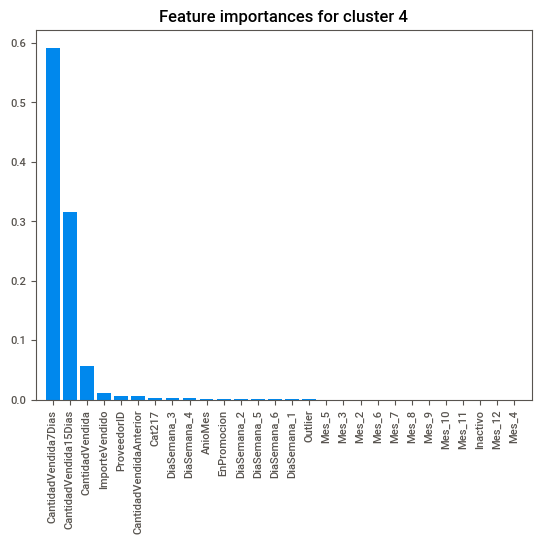

RMSE for cluster 7: 22.179082123159784


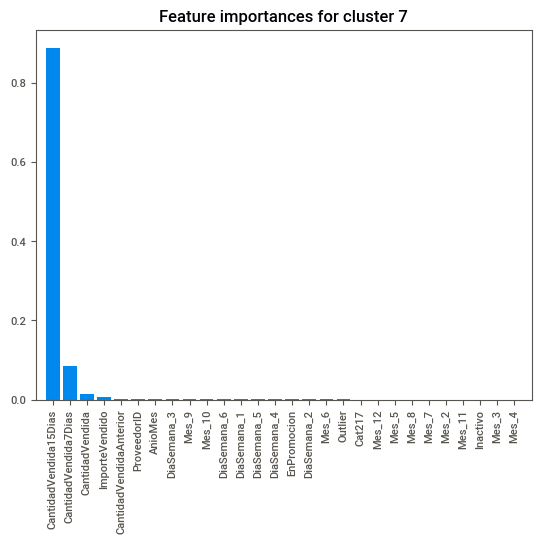

RMSE for cluster 1: 3.0435542266463234


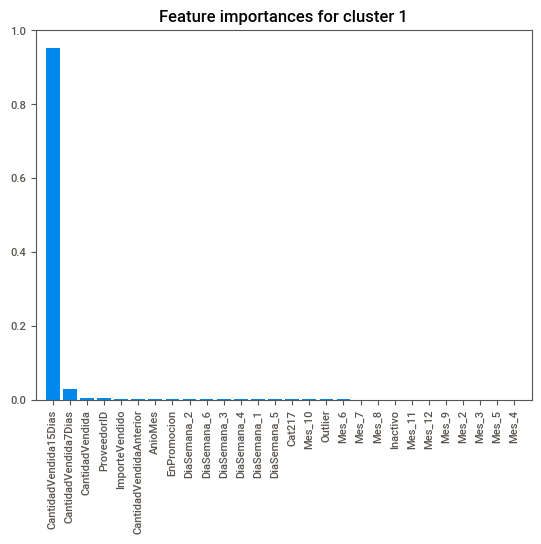

RMSE for cluster 6: 0.9336150032791476


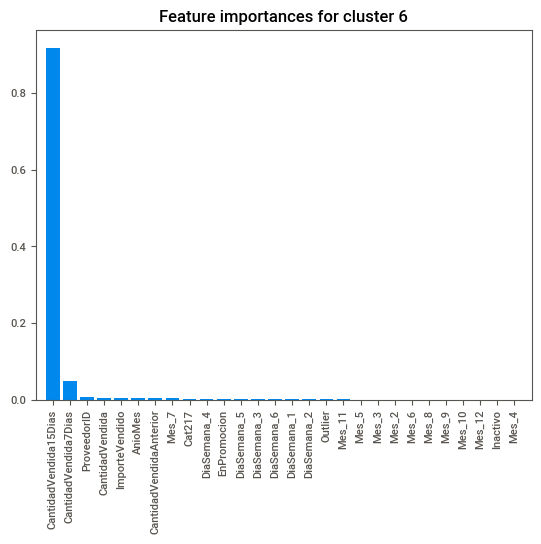

RMSE for cluster 0: 0.9452828578380593


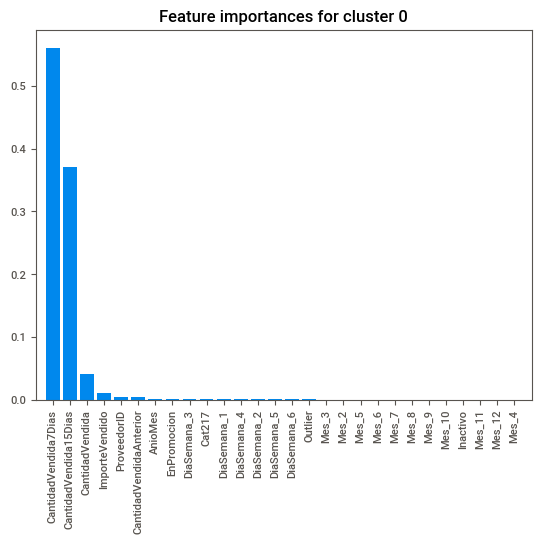

RMSE for cluster 10: 2.051481206171783


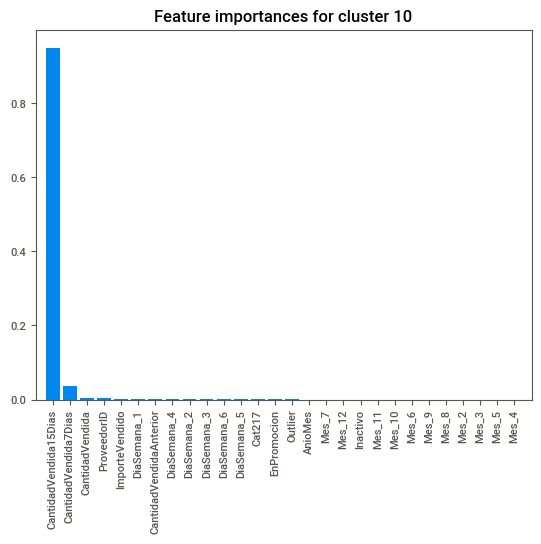

RMSE for cluster 3: 0.5938305885687162


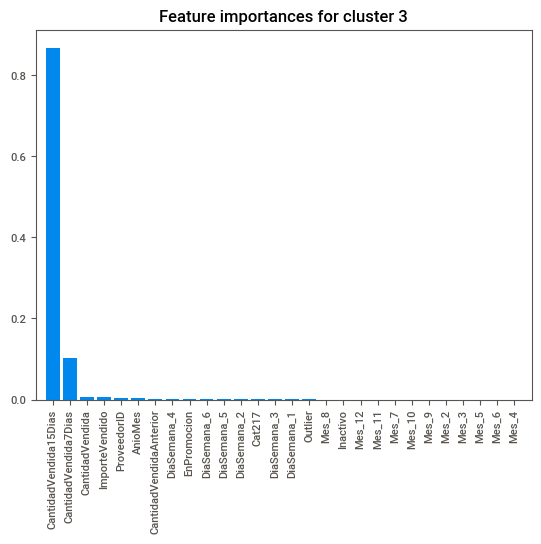

RMSE for cluster 9: 1.0889002633199372


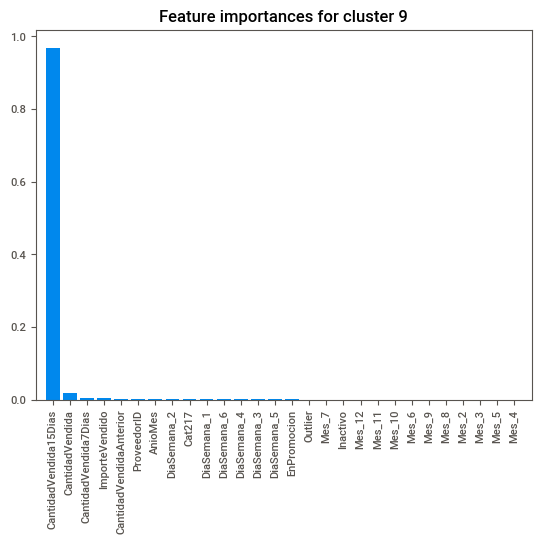

RMSE for cluster 5: 0.6595484436297633


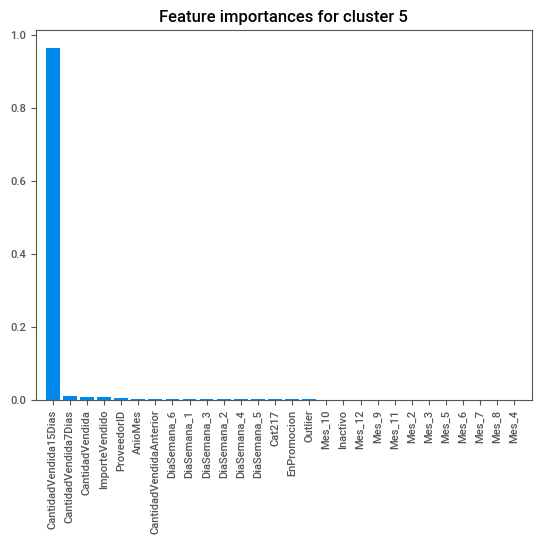

RMSE for cluster 2: 0.46833114423493344


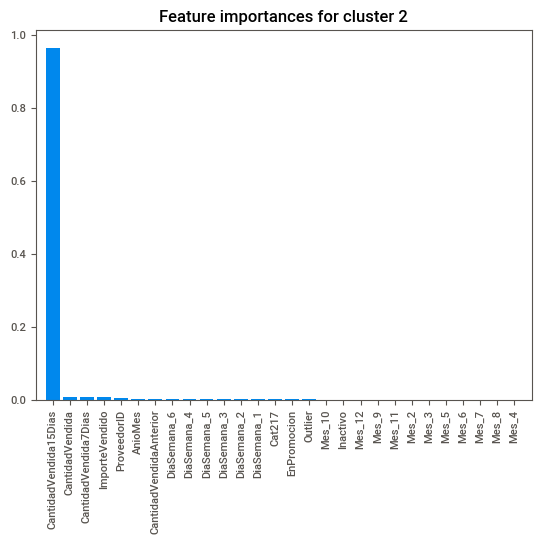

RMSE for cluster 8: 0.500440082472948


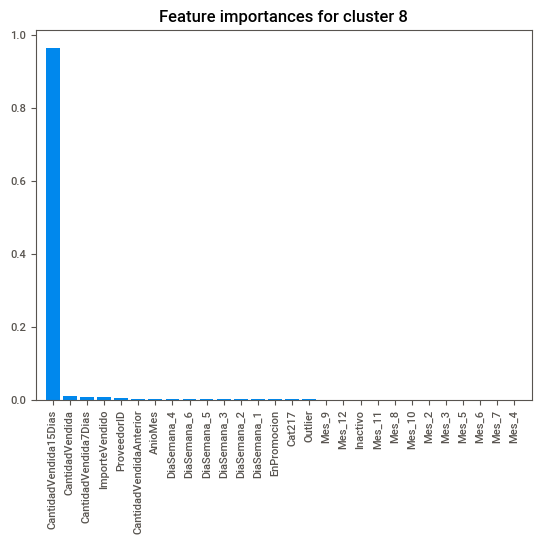

    Cluster       RMSE
0         4   1.233324
1         7  22.179082
2         1   3.043554
3         6   0.933615
4         0   0.945283
5        10   2.051481
6         3   0.593831
7         9   1.088900
8         5   0.659548
9         2   0.468331
10        8   0.500440


In [174]:
# Crear diccionarios para almacenar los modelos de Random Forest, las características importantes y los RMSE por clúster
modelos_por_cluster = {}
features_por_cluster = {}
rmse_por_cluster = {}

# Identificar y usar todas las características para cada clúster
for cluster in ventas_completa['Cluster'].unique():
    # Filtrar los datos por clúster
    datos_cluster = ventas_completa[ventas_completa['Cluster'] == cluster]
    
    # Separar las características y la variable objetivo
    X_cluster = datos_cluster.drop(columns=['CantidadVendidaProximos15Dias', 'Cluster', 'Cluster_PCA', 'ProductoID'])
    y_cluster = datos_cluster['CantidadVendidaProximos15Dias']
    
    # Entrenar el modelo de Random Forest con todas las características
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_cluster, y_cluster)
    
    # Guardar el modelo y las características importantes en los diccionarios
    modelos_por_cluster[cluster] = rf
    features_por_cluster[cluster] = X_cluster.columns

    # Predicciones para calcular el RMSE
    y_pred = rf.predict(X_cluster)
    rmse = np.sqrt(mean_squared_error(y_cluster, y_pred))
    
    # Guardar el RMSE en el diccionario
    rmse_por_cluster[cluster] = rmse

    # Imprimir el RMSE para este clúster
    print(f"RMSE for cluster {cluster}: {rmse}")

    # Calcular la importancia de características y graficarlas
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure()
    plt.title(f"Feature importances for cluster {cluster}")
    plt.bar(range(X_cluster.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_cluster.shape[1]), [X_cluster.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X_cluster.shape[1]])
    plt.show()

# Crear un DataFrame para almacenar las predicciones
predicciones_df = pd.DataFrame(columns=['ProductoID', 'Prediccion'])

# Predecir para cada producto utilizando el modelo del clúster correspondiente
for producto_id in ventas_completa['ProductoID'].unique():
    # Filtrar los datos por producto
    datos_producto = ventas_completa[ventas_completa['ProductoID'] == producto_id]
    
    # Verificar que el producto tiene datos
    if datos_producto.empty:
        print(f'Advertencia: No se encontraron datos para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Asegurarse de que el producto tiene asignado un clúster
    cluster = datos_producto['Cluster'].iloc[0] if not datos_producto['Cluster'].isnull().all() else None
    if cluster is None:
        print(f'Advertencia: No se encontró clúster asignado para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Obtener las características importantes específicas del clúster
    important_features = features_por_cluster.get(cluster)
    if important_features is None:
        print(f'Error: No se encontraron características importantes para el clúster {cluster}.')
        continue
    
    # Separar las características importantes (sin la variable objetivo)
    X_producto = datos_producto[important_features]
      
    # Comprobación adicional de NaN, inf y forma de los datos
    X_producto = X_producto.astype(np.float32)
    if X_producto.isin([np.inf, -np.inf]).values.any() or X_producto.isna().values.any():
        print(f'Advertencia: Datos de {producto_id} contienen valores inf o NaN. Sustituyendo por 0.')
        X_producto = X_producto.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    
    # Hacer la predicción usando el modelo correspondiente al clúster
    if not X_producto.empty and cluster in modelos_por_cluster:
        prediccion = modelos_por_cluster[cluster].predict(X_producto)
                
        # Crear un DataFrame temporal con la predicción
        temp_df = pd.DataFrame({
            'ProductoID': [producto_id],
            'Prediccion': [prediccion.mean()]
        })
        
        # Añadir la predicción al DataFrame de predicciones
        predicciones_df = pd.concat([predicciones_df, temp_df], ignore_index=True)
    else:
        print(f'Error: No se pudo hacer la predicción para ProductoID {producto_id}.')

# Convertir el diccionario de RMSE a un DataFrame para visualizar los resultados
rmse_df = pd.DataFrame(list(rmse_por_cluster.items()), columns=['Cluster', 'RMSE'])
print(rmse_df)


In [175]:
predicciones_df.head()

,ProductoID,Prediccion
0,600790,11.124979
1,600793,4.636965
2,600794,17.545571
3,605089,23.167625
4,605548,2.074158


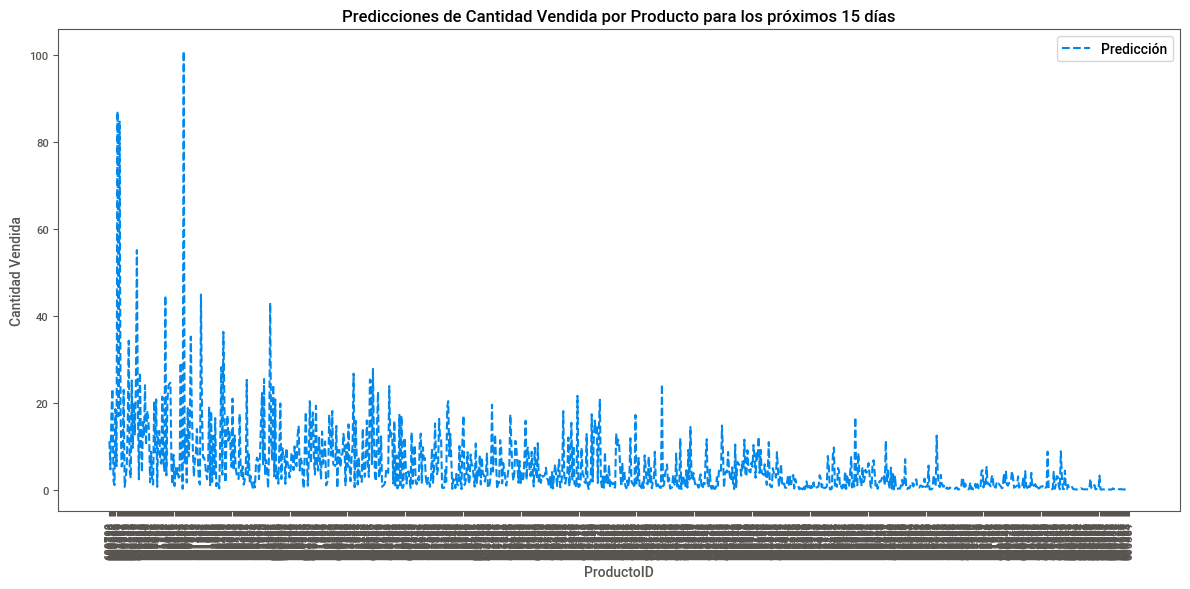

In [176]:
# Crear el gráfico de líneas para las predicciones por producto
plt.figure(figsize=(12, 6))
plt.plot(predicciones_df['ProductoID'], predicciones_df['Prediccion'], label='Predicción', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('ProductoID')
plt.ylabel('Cantidad Vendida')
plt.title('Predicciones de Cantidad Vendida por Producto para los próximos 15 días')
plt.legend()

# Rotar las etiquetas del eje x para una mejor lectura
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Clustering con PCA

RMSE for cluster_pca 6: 0.8348203385830114


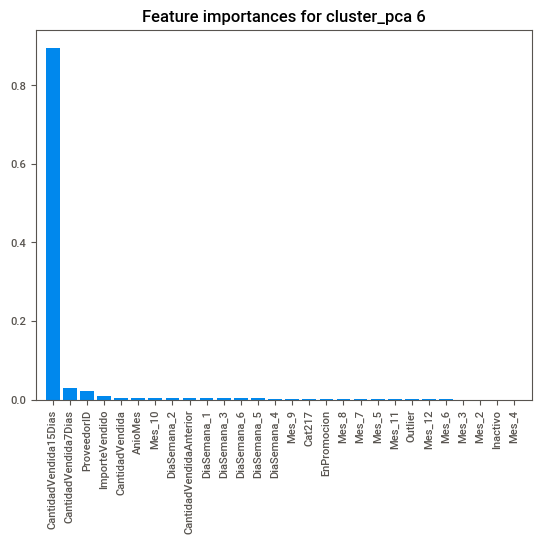

RMSE for cluster_pca 9: 5.010869514383902


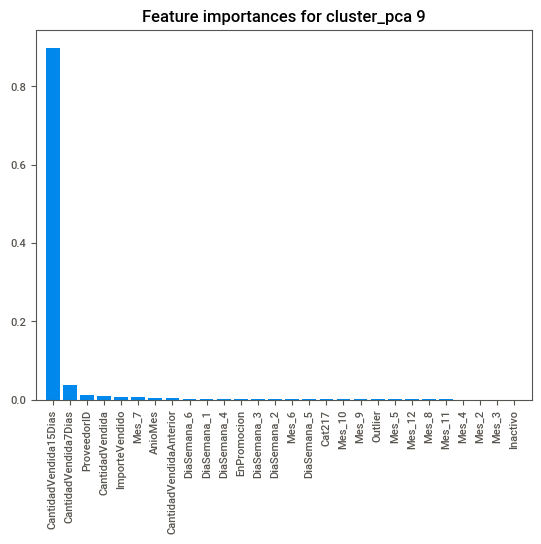

RMSE for cluster_pca 3: 8.832566410483672


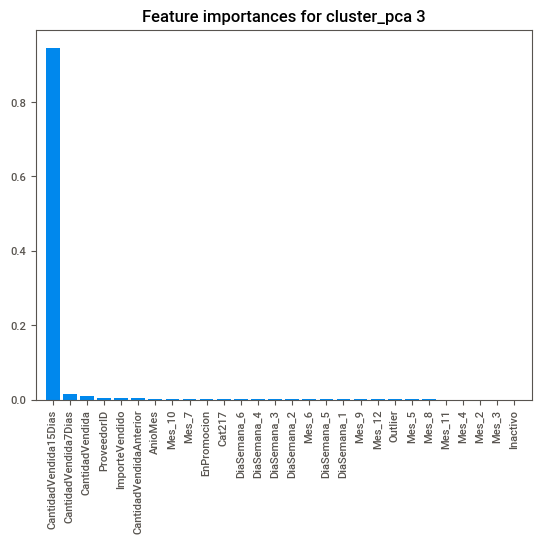

RMSE for cluster_pca 8: 13.057526885618275


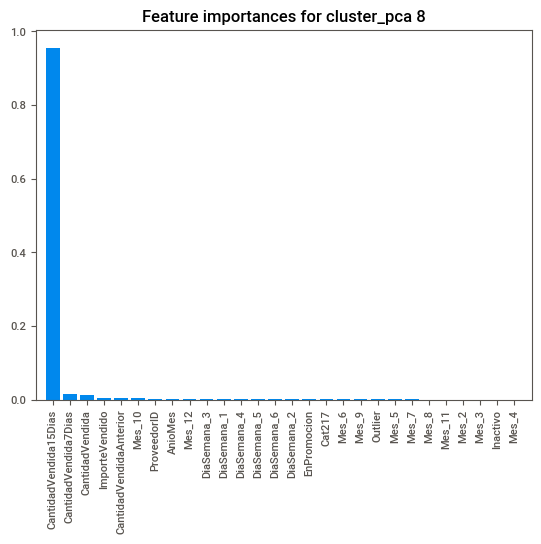

RMSE for cluster_pca 2: 18.829921900334263


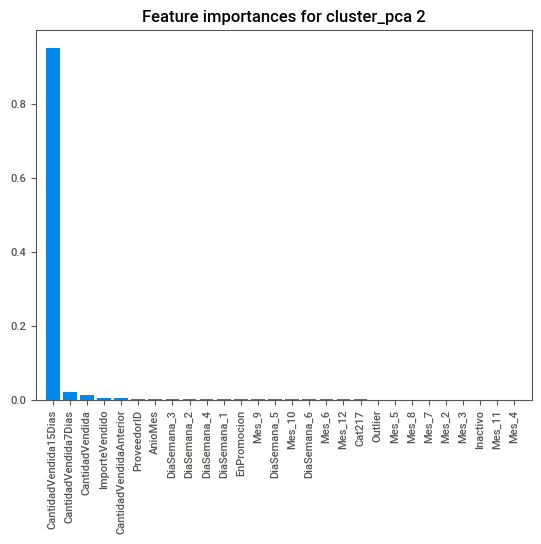

RMSE for cluster_pca 5: 32.14263397435754


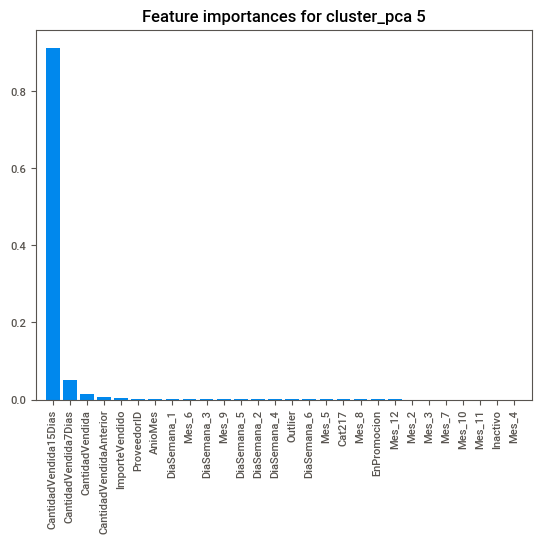

RMSE for cluster_pca 10: 55.13479972522561


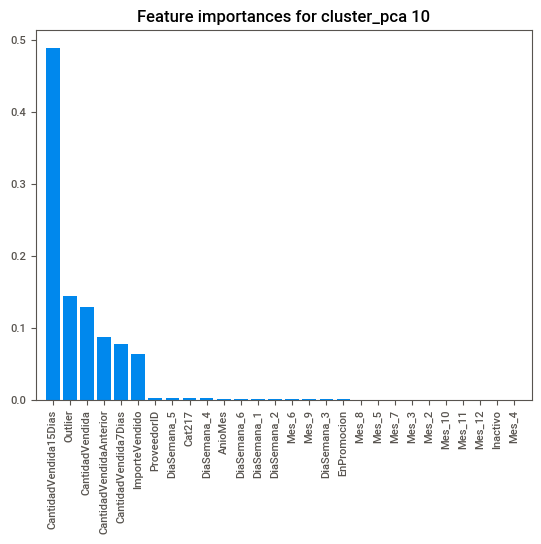

RMSE for cluster_pca 4: 146.30327550358166


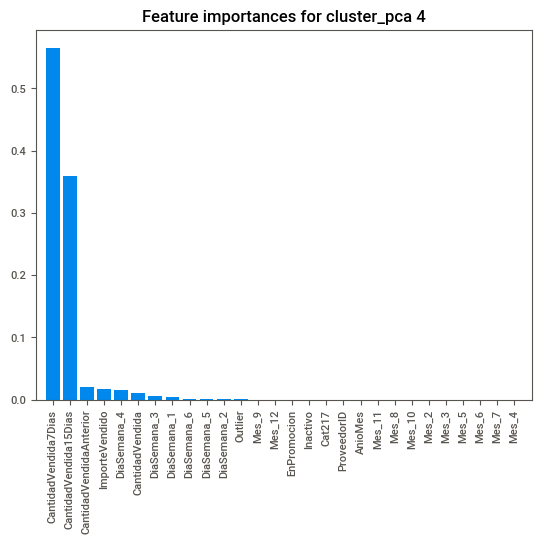

RMSE for cluster_pca 7: 0.7156826340152327


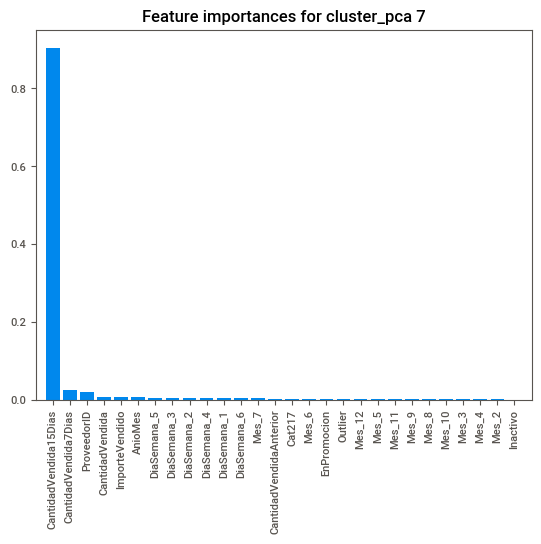

RMSE for cluster_pca 0: 0.7026686352169436


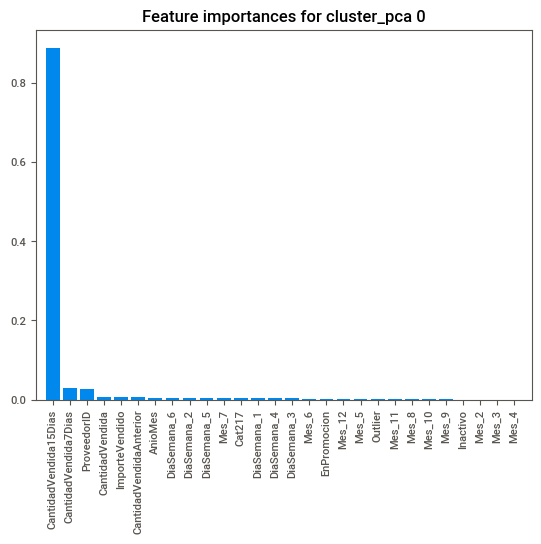

RMSE for cluster_pca 1: 0.5903915786930257


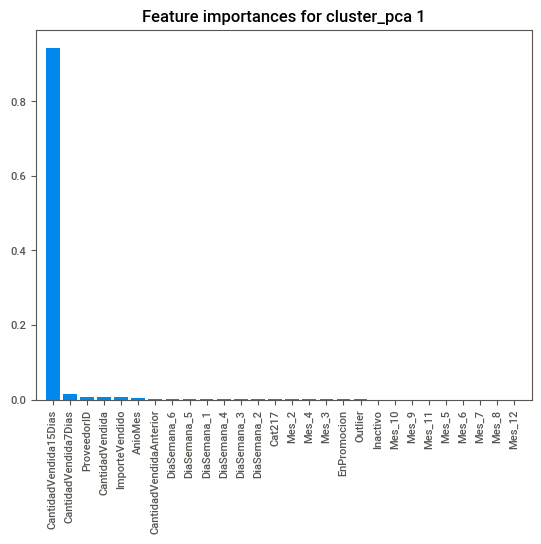

    Cluster        RMSE
0         6    0.834820
1         9    5.010870
2         3    8.832566
3         8   13.057527
4         2   18.829922
5         5   32.142634
6        10   55.134800
7         4  146.303276
8         7    0.715683
9         0    0.702669
10        1    0.590392


In [177]:
# Crear diccionarios para almacenar los modelos de Random Forest, las características importantes por clúster y los RMSE
modelos_por_cluster_pca = {}
features_por_cluster_pca = {}
rmse_por_cluster_pca = {}

# Identificar y usar todas las características para cada clúster
for cluster in ventas_completa['Cluster_PCA'].unique():
    # Filtrar los datos por clúster
    datos_cluster = ventas_completa[ventas_completa['Cluster_PCA'] == cluster]
    
    # Separar las características y la variable objetivo
    X_cluster = datos_cluster.drop(columns=['CantidadVendidaProximos15Dias', 'Cluster', 'Cluster_PCA', 'ProductoID'])
    y_cluster = datos_cluster['CantidadVendidaProximos15Dias']
    
    # Entrenar el modelo de Random Forest con todas las características
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_cluster, y_cluster)
    
    # Guardar el modelo y las características importantes en los diccionarios
    modelos_por_cluster_pca[cluster] = rf
    features_por_cluster_pca[cluster] = X_cluster.columns

    # Predicciones para calcular el RMSE
    y_pred = rf.predict(X_cluster)
    rmse = np.sqrt(mean_squared_error(y_cluster, y_pred))
    
    # Guardar el RMSE en el diccionario
    rmse_por_cluster_pca[cluster] = rmse

    # Printear el RMSE para este clúster
    print(f"RMSE for cluster_pca {cluster}: {rmse}")

    # Calcular la importancia de características y graficarlas
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure()
    plt.title(f"Feature importances for cluster_pca {cluster}")
    plt.bar(range(X_cluster.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_cluster.shape[1]), [X_cluster.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X_cluster.shape[1]])
    plt.show()

# Crear un DataFrame para almacenar las predicciones
predicciones_df_pca = pd.DataFrame(columns=['ProductoID', 'Prediccion'])

# Predecir para cada producto utilizando el modelo del clúster correspondiente
for producto_id in ventas_completa['ProductoID'].unique():
    # Filtrar los datos por producto
    datos_producto = ventas_completa[ventas_completa['ProductoID'] == producto_id]
    
    # Verificar que el producto tiene datos
    if datos_producto.empty:
        print(f'Advertencia: No se encontraron datos para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Asegurarse de que el producto tiene asignado un clúster
    cluster = datos_producto['Cluster_PCA'].iloc[0] if not datos_producto['Cluster_PCA'].isnull().all() else None
    if cluster is None:
        print(f'Advertencia: No se encontró clúster asignado para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Obtener las características importantes específicas del clúster
    important_features = features_por_cluster_pca.get(cluster)
    if important_features is None:
        print(f'Error: No se encontraron características importantes para el clúster {cluster}.')
        continue
    
    # Separar las características importantes (sin la variable objetivo)
    X_producto = datos_producto[important_features]
      
    # Comprobación adicional de NaN, inf y forma de los datos
    X_producto = X_producto.astype(np.float32)
    if X_producto.isin([np.inf, -np.inf]).values.any() or X_producto.isna().values.any():
        print(f'Advertencia: Datos de {producto_id} contienen valores inf o NaN. Sustituyendo por 0.')
        X_producto = X_producto.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    
    # Hacer la predicción usando el modelo correspondiente al clúster
    if not X_producto.empty and cluster in modelos_por_cluster_pca:
        prediccion = modelos_por_cluster_pca[cluster].predict(X_producto)
                
        # Crear un DataFrame temporal con la predicción
        temp_df = pd.DataFrame({
            'ProductoID': [producto_id],
            'Prediccion': [prediccion.mean()]
        })
        
        # Añadir la predicción al DataFrame de predicciones
        predicciones_df_pca = pd.concat([predicciones_df_pca, temp_df], ignore_index=True)
    else:
        print(f'Error: No se pudo hacer la predicción para ProductoID {producto_id}.')

# Convertir el diccionario de RMSE a un DataFrame para visualizar los resultados
rmse_df_pca = pd.DataFrame(list(rmse_por_cluster_pca.items()), columns=['Cluster', 'RMSE'])
print(rmse_df_pca)


In [178]:
predicciones_df_pca.head()

,ProductoID,Prediccion
0,600790,11.359188
1,600793,4.847739
2,600794,12.823961
3,605089,13.133546
4,605548,2.115523


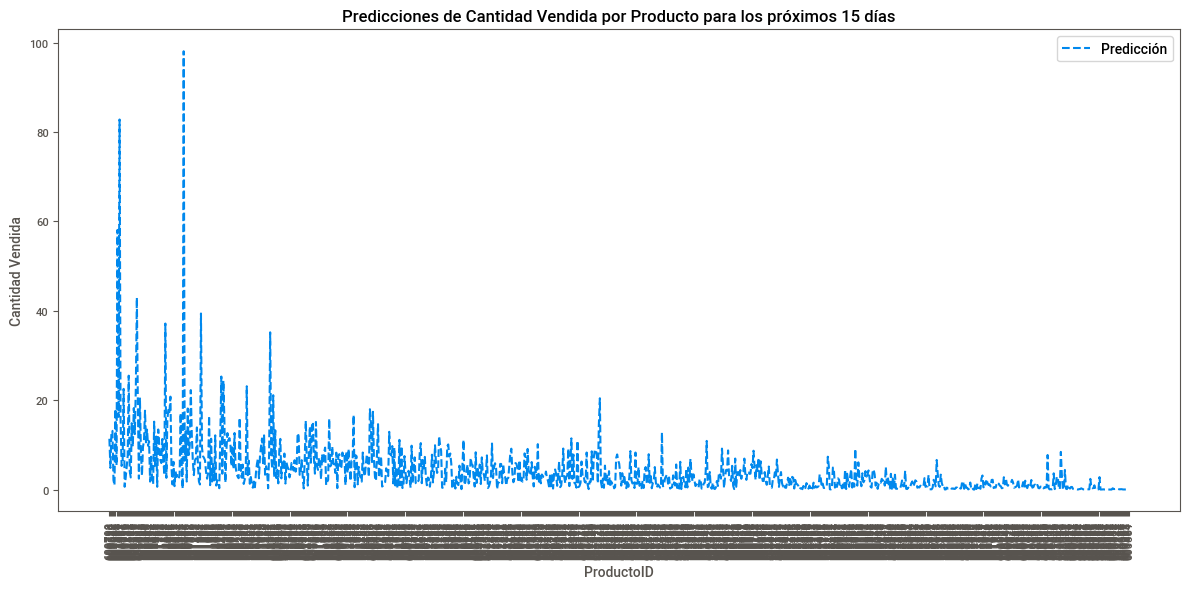

In [179]:
# Crear el gráfico de líneas para las predicciones por producto
plt.figure(figsize=(12, 6))
plt.plot(predicciones_df_pca['ProductoID'], predicciones_df_pca['Prediccion'], label='Predicción', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('ProductoID')
plt.ylabel('Cantidad Vendida')
plt.title('Predicciones de Cantidad Vendida por Producto para los próximos 15 días')
plt.legend()

# Rotar las etiquetas del eje x para una mejor lectura
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

De acuerdo a los RMSE, como para algunos clusters con PCA dan muy altos, seleccionamos el conjunto de modelos sin PCA (el original)

Boosting

RMSE for cluster_boost 4: 1.5818431020186376


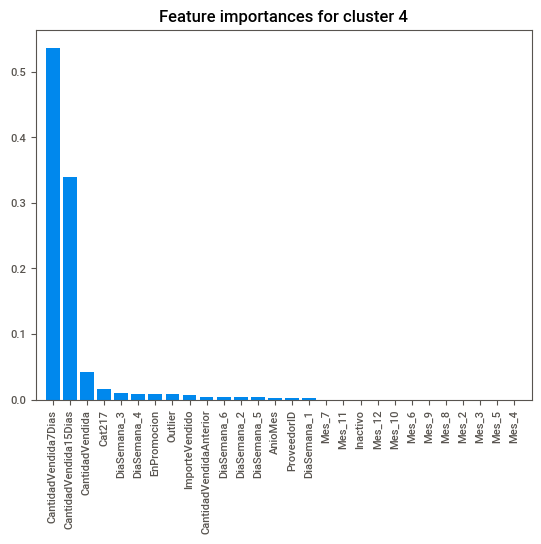

RMSE for cluster_boost 7: 11.894693327849287


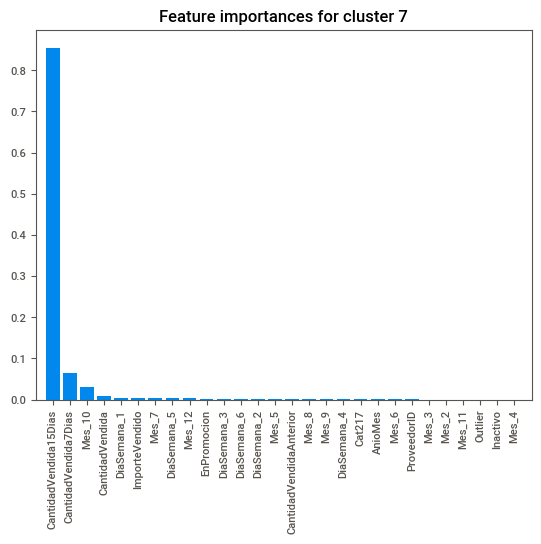

RMSE for cluster_boost 1: 5.641404249530779


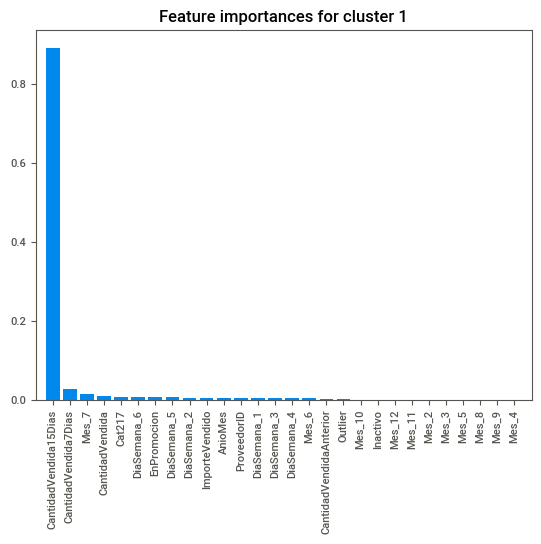

RMSE for cluster_boost 6: 1.6177742653650031


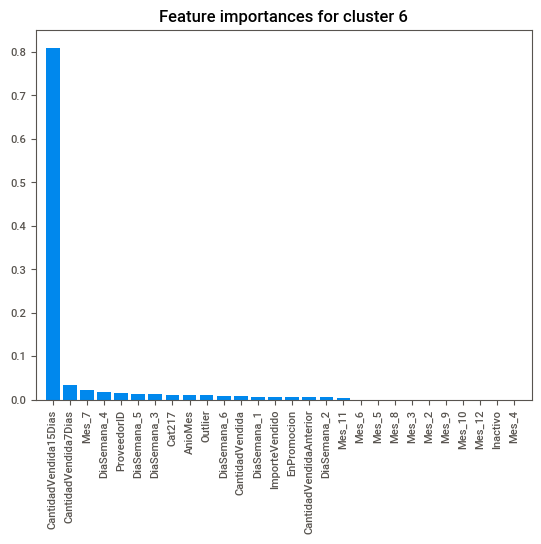

RMSE for cluster_boost 0: 1.143235899291668


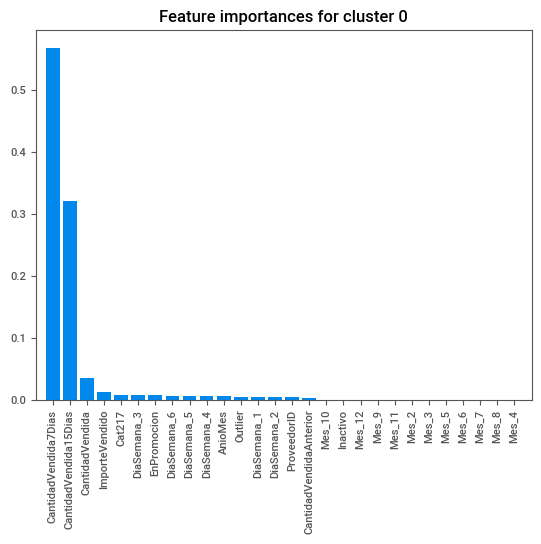

RMSE for cluster_boost 10: 3.8799115619819715


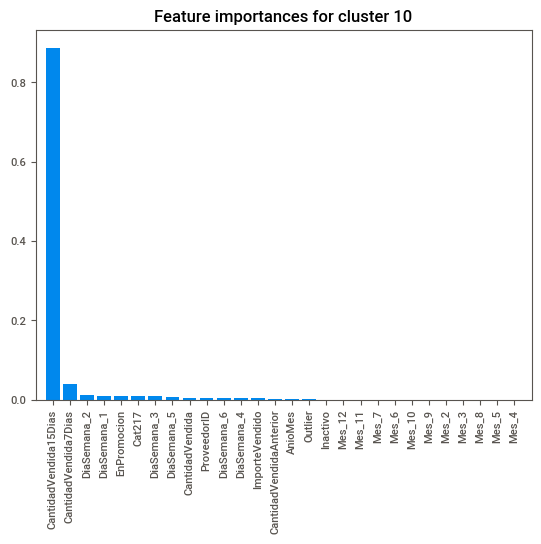

RMSE for cluster_boost 3: 0.7164988348368367


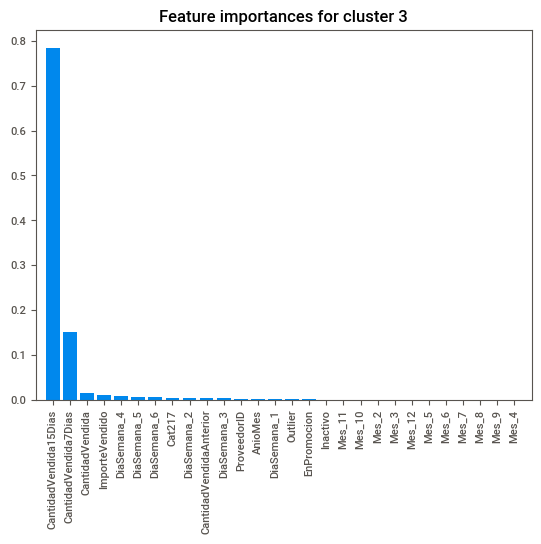

RMSE for cluster_boost 9: 1.3888692419411652


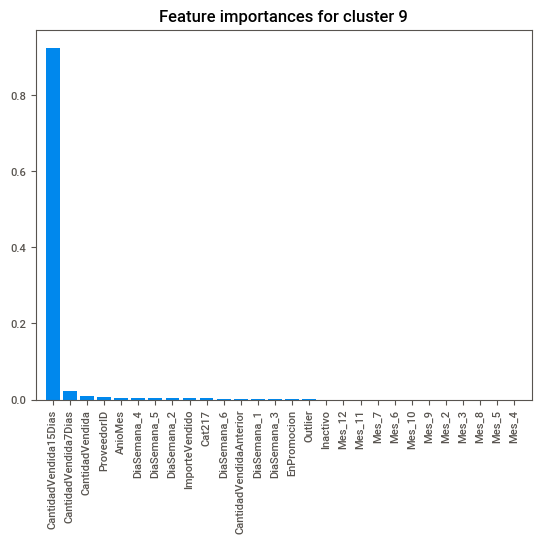

RMSE for cluster_boost 5: 0.8375120668339291


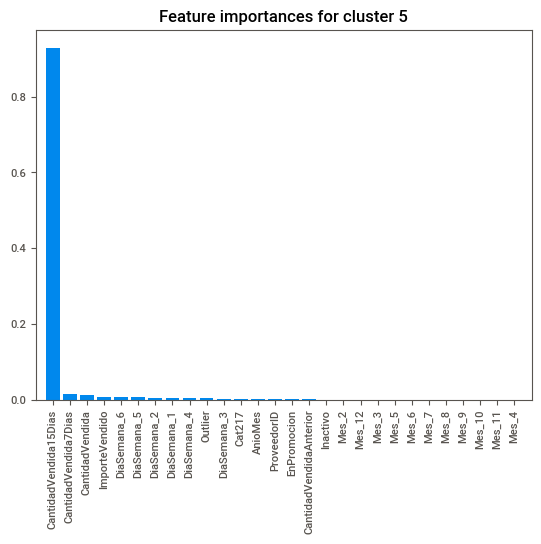

RMSE for cluster_boost 2: 0.7010210373345799


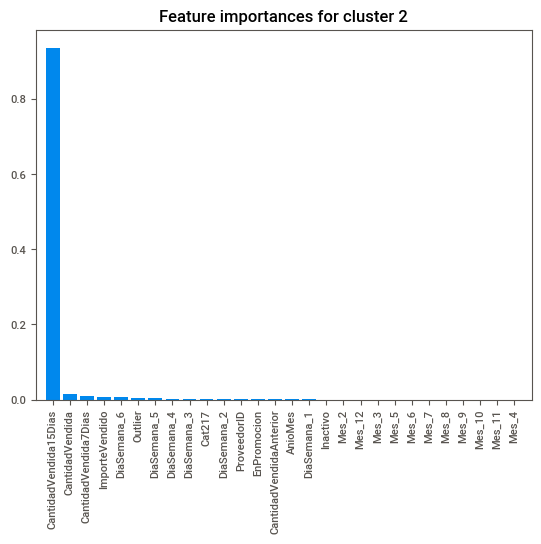

RMSE for cluster_boost 8: 0.7503467926549295


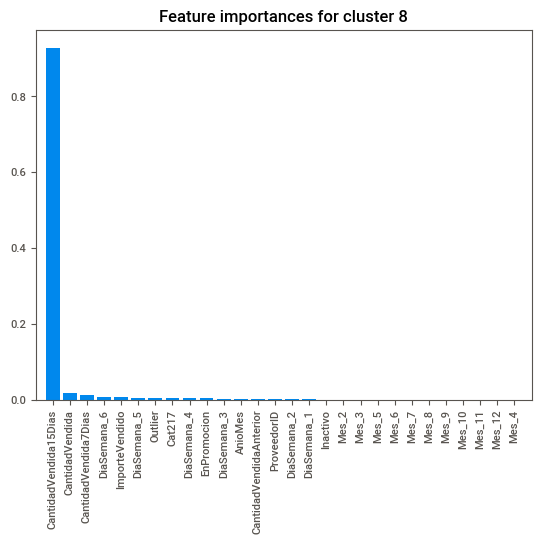

    Cluster       RMSE
0         4   1.581843
1         7  11.894693
2         1   5.641404
3         6   1.617774
4         0   1.143236
5        10   3.879912
6         3   0.716499
7         9   1.388869
8         5   0.837512
9         2   0.701021
10        8   0.750347


In [180]:
from xgboost import XGBRegressor

# Función para convertir columnas categóricas a numéricas
def convert_categorical(df):
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].astype('category').cat.codes
    return df

# Crear diccionarios para almacenar los modelos de XGBoost, las características importantes y los RMSE por clúster
modelos_por_cluster_boost = {}
features_por_cluster_boost = {}
rmse_por_cluster_boost = {}

# Identificar y usar todas las características para cada clúster
for cluster in ventas_completa['Cluster'].unique():
    # Filtrar los datos por clúster
    datos_cluster = ventas_completa[ventas_completa['Cluster'] == cluster]
    
    # Separar las características y la variable objetivo
    X_cluster = datos_cluster.drop(columns=['CantidadVendidaProximos15Dias', 'Cluster', 'Cluster_PCA', 'ProductoID'])
    y_cluster = datos_cluster['CantidadVendidaProximos15Dias']

    # Convertir columnas categóricas a numéricas
    X_cluster = convert_categorical(X_cluster)
    
    # Entrenar el modelo de XGBoost con todas las características
    xgb = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    xgb.fit(X_cluster, y_cluster)
    
    # Guardar el modelo y las características importantes en los diccionarios
    modelos_por_cluster_boost[cluster] = xgb
    features_por_cluster_boost[cluster] = X_cluster.columns

    # Predicciones para calcular el RMSE
    y_pred = xgb.predict(X_cluster)
    rmse = np.sqrt(mean_squared_error(y_cluster, y_pred))
    rmse_por_cluster_boost[cluster] = rmse  # Guardar el RMSE en el diccionario
    
    # Printear el RMSE para este clúster
    print(f"RMSE for cluster_boost {cluster}: {rmse}")

    # Calcular la importancia de características y graficarlas
    importances = xgb.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure()
    plt.title(f"Feature importances for cluster {cluster}")
    plt.bar(range(X_cluster.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_cluster.shape[1]), [X_cluster.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X_cluster.shape[1]])
    plt.show()

# Crear un DataFrame para almacenar las predicciones
predicciones_df_boost = pd.DataFrame(columns=['ProductoID', 'Prediccion'])

# Predecir para cada producto utilizando el modelo del clúster correspondiente
for producto_id in ventas_completa['ProductoID'].unique():
    # Filtrar los datos por producto
    datos_producto = ventas_completa[ventas_completa['ProductoID'] == producto_id]
    
    # Verificar que el producto tiene datos
    if datos_producto.empty:
        print(f'Advertencia: No se encontraron datos para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Asegurarse de que el producto tiene asignado un clúster
    cluster = datos_producto['Cluster'].iloc[0] if not datos_producto['Cluster'].isnull().all() else None
    if cluster is None:
        print(f'Advertencia: No se encontró clúster asignado para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Obtener las características importantes específicas del clúster
    important_features = features_por_cluster_boost.get(cluster)
    if important_features is None:
        print(f'Error: No se encontraron características importantes para el clúster {cluster}.')
        continue
    
    # Separar las características importantes (sin la variable objetivo)
    X_producto = datos_producto[important_features]
      
    # Comprobación adicional de NaN, inf y forma de los datos
    X_producto = X_producto.astype(np.float32)
    if X_producto.isin([np.inf, -np.inf]).values.any() or X_producto.isna().values.any():
        print(f'Advertencia: Datos de {producto_id} contienen valores inf o NaN. Sustituyendo por 0.')
        X_producto = X_producto.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    
    # Hacer la predicción usando el modelo correspondiente al clúster
    if not X_producto.empty and cluster in modelos_por_cluster_boost:
        prediccion = modelos_por_cluster_boost[cluster].predict(X_producto)
                
        # Crear un DataFrame temporal con la predicción
        temp_df = pd.DataFrame({
            'ProductoID': [producto_id],
            'Prediccion': [prediccion.mean()]
        })
        
        # Añadir la predicción al DataFrame de predicciones
        predicciones_df_boost = pd.concat([predicciones_df_boost, temp_df], ignore_index=True)
    else:
        print(f'Error: No se pudo hacer la predicción para ProductoID {producto_id}.')

# Crear un DataFrame para mostrar los RMSE por clúster
rmse_df_boost = pd.DataFrame(list(rmse_por_cluster_boost.items()), columns=['Cluster', 'RMSE'])
print(rmse_df_boost)



In [181]:
predicciones_df_boost.head()

,ProductoID,Prediccion
0,600790,11.384870
1,600793,4.751293
2,600794,17.971752
3,605089,22.472469
4,605548,2.123561


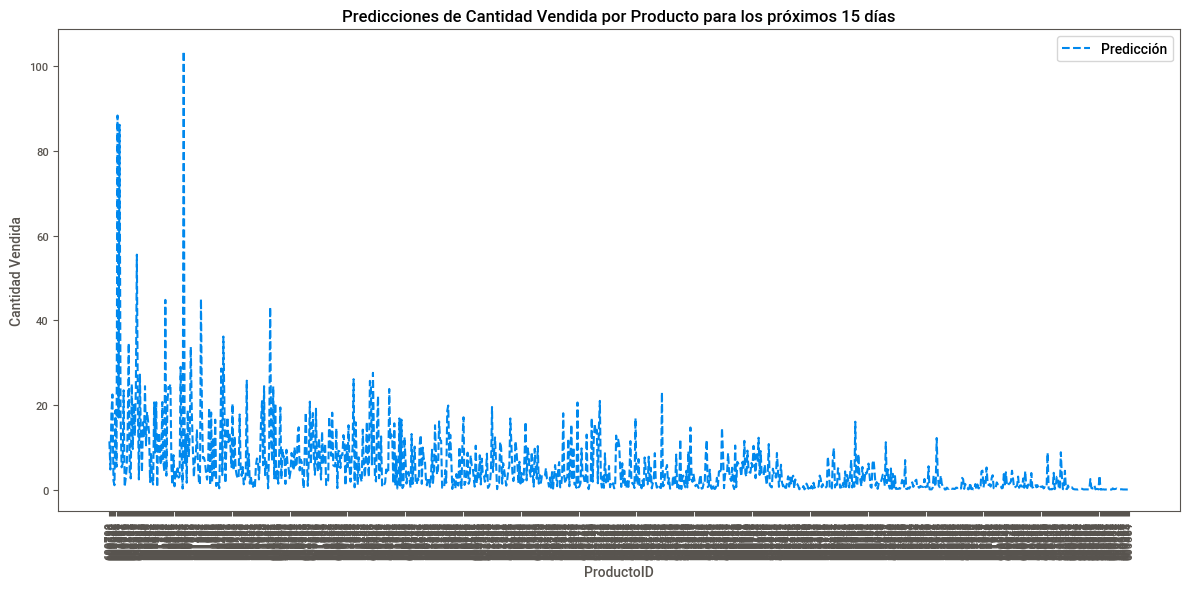

In [182]:
# Crear el gráfico de líneas para las predicciones por producto
plt.figure(figsize=(12, 6))
plt.plot(predicciones_df_boost['ProductoID'], predicciones_df_boost['Prediccion'], label='Predicción', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('ProductoID')
plt.ylabel('Cantidad Vendida')
plt.title('Predicciones de Cantidad Vendida por Producto para los próximos 15 días')
plt.legend()

# Rotar las etiquetas del eje x para una mejor lectura
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Best_Boosting

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 4: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
RMSE for cluster 4: 2.276377753875675


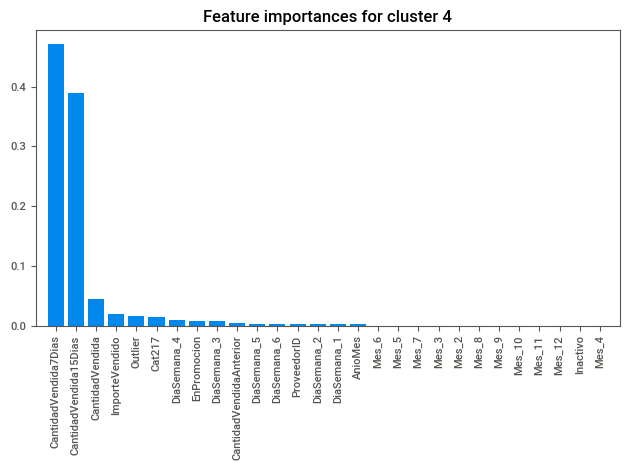

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 7: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
RMSE for cluster 7: 23.006172327688805


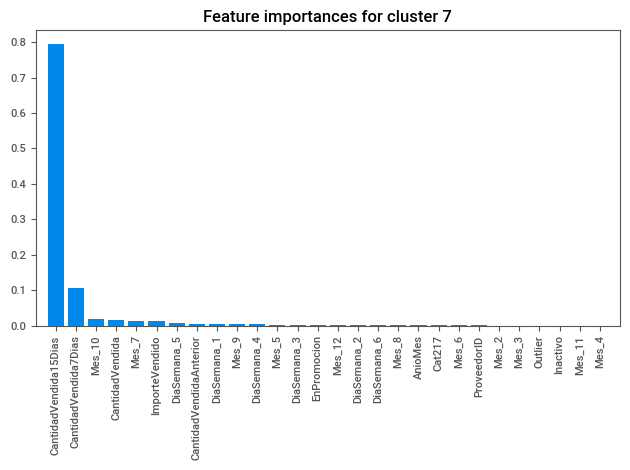

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 1: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
RMSE for cluster 1: 8.890053122055676


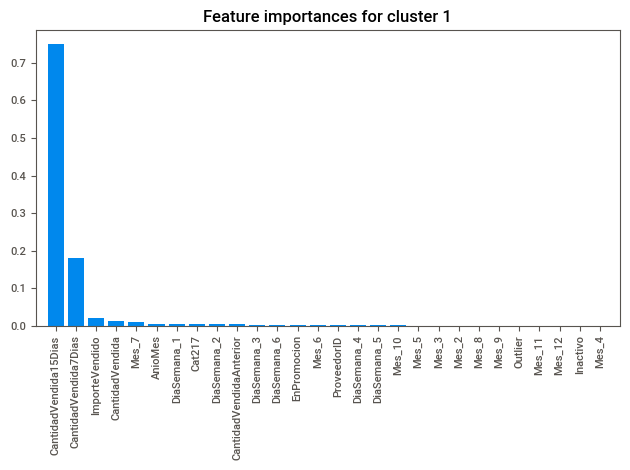

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 6: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
RMSE for cluster 6: 2.7672030560685053


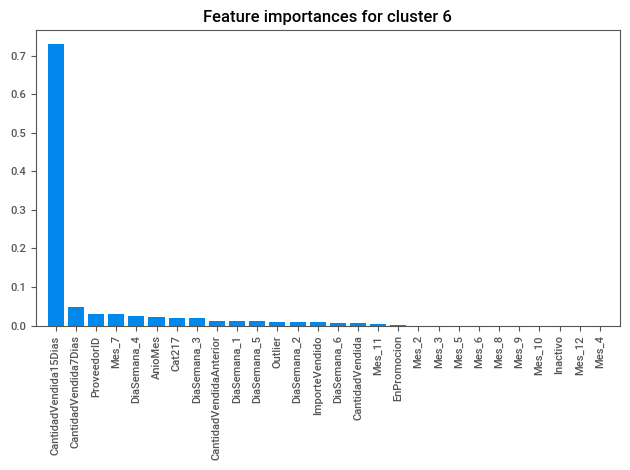

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 0: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
RMSE for cluster 0: 1.5430742813523657


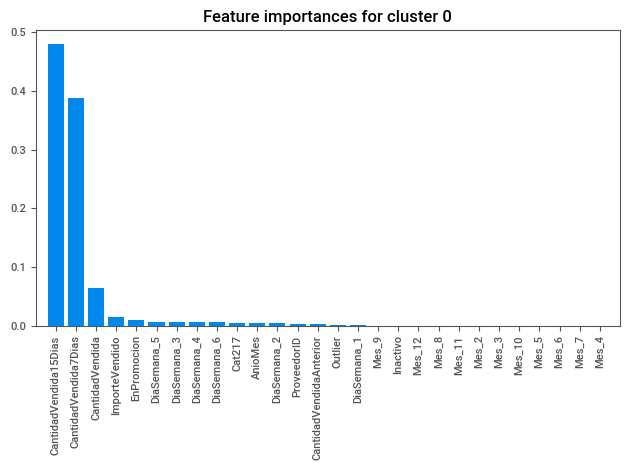

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 10: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
RMSE for cluster 10: 3.4488339238957684


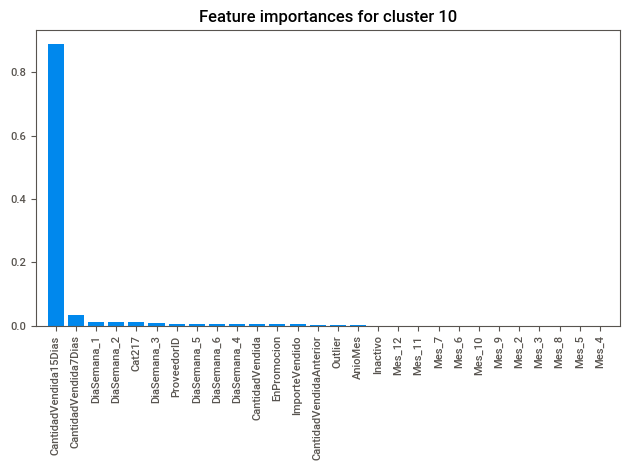

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 3: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
RMSE for cluster 3: 0.93074674410604


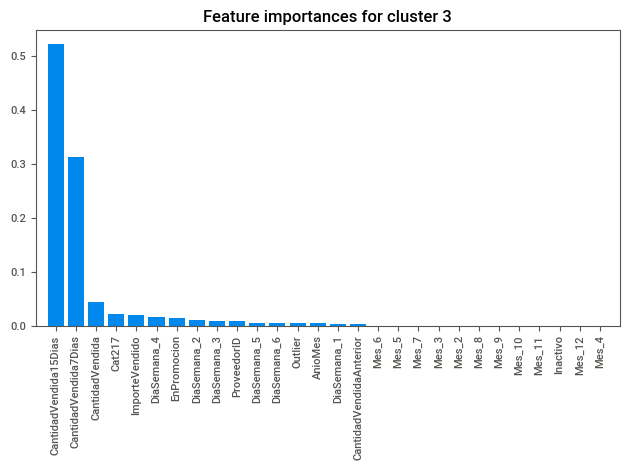

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 9: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
RMSE for cluster 9: 3.2245921763256296


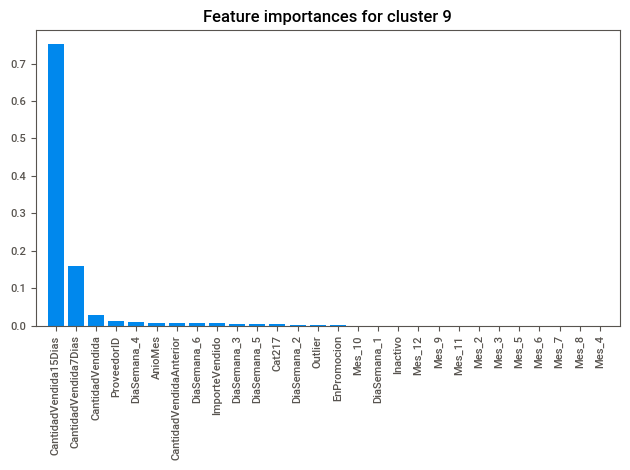

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 5: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
RMSE for cluster 5: 1.0128680897293914


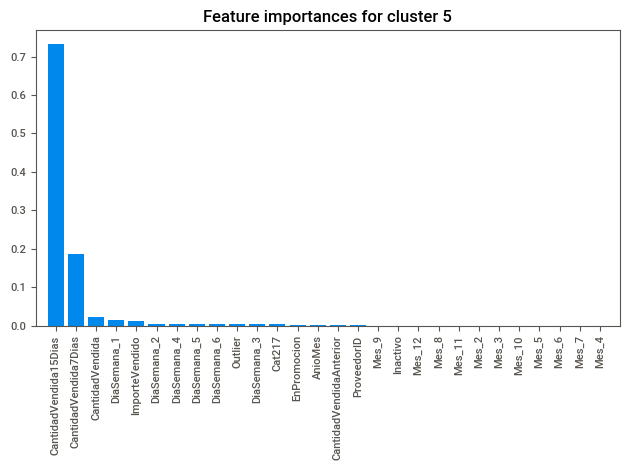

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 2: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
RMSE for cluster 2: 0.8266857628495176


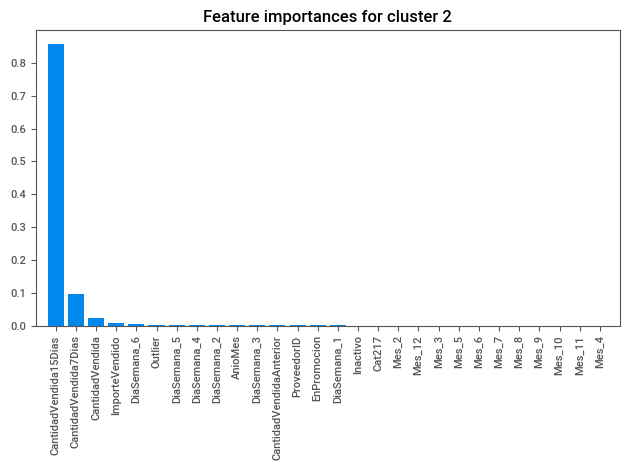

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for cluster 8: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
RMSE for cluster 8: 0.9258482056532656


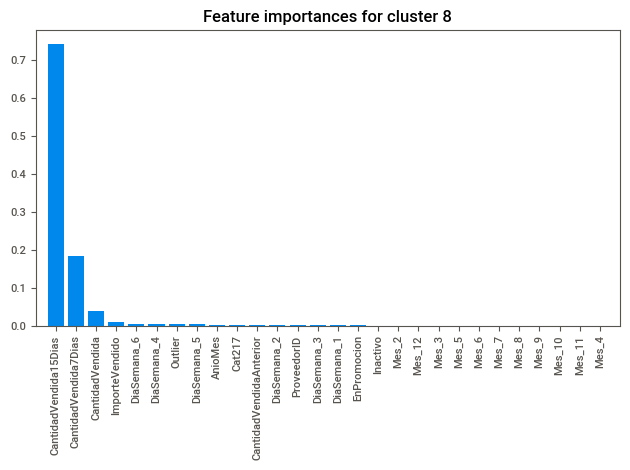

    Cluster       RMSE
0         4   2.276378
1         7  23.006172
2         1   8.890053
3         6   2.767203
4         0   1.543074
5        10   3.448834
6         3   0.930747
7         9   3.224592
8         5   1.012868
9         2   0.826686
10        8   0.925848


In [183]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para convertir columnas categóricas a numéricas
def convert_categorical(df):
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].astype('category').cat.codes
    return df

# Crear diccionarios para almacenar los modelos de XGBoost, las características importantes por clúster y los RMSEs
modelos_por_cluster_best_boost = {}
features_por_cluster_best_boost = {}
rmse_por_cluster_best_boost = {}

# Parámetros para la búsqueda en la cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Identificar y usar todas las características para cada clúster
for cluster in ventas_completa['Cluster'].unique():
    # Filtrar los datos por clúster
    datos_cluster = ventas_completa[ventas_completa['Cluster'] == cluster]
    
    # Separar las características y la variable objetivo
    X_cluster = datos_cluster.drop(columns=['CantidadVendidaProximos15Dias', 'Cluster', 'Cluster_PCA', 'ProductoID'])
    y_cluster = datos_cluster['CantidadVendidaProximos15Dias']

    # Convertir columnas categóricas a numéricas
    X_cluster = convert_categorical(X_cluster)
    
    # Configurar el modelo y el GridSearchCV
    xgb = XGBRegressor(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
    
    # Ajustar el modelo
    grid_search.fit(X_cluster, y_cluster)
    
    # Guardar el mejor modelo y las características importantes en los diccionarios
    modelos_por_cluster_best_boost[cluster] = grid_search.best_estimator_
    features_por_cluster_best_boost[cluster] = X_cluster.columns

    # Predicciones para calcular el RMSE
    y_pred = grid_search.best_estimator_.predict(X_cluster)
    rmse = np.sqrt(mean_squared_error(y_cluster, y_pred))
    
    # Guardar el RMSE en el diccionario
    rmse_por_cluster_best_boost[cluster] = rmse
    
    # Printear el RMSE para este clúster y el mejor conjunto de hiperparámetros
    print(f"Best hyperparameters for cluster {cluster}: {grid_search.best_params_}")
    print(f"RMSE for cluster {cluster}: {rmse}")
    
    # Calcular la importancia de características y graficarlas
    importances = grid_search.best_estimator_.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure()
    plt.title(f"Feature importances for cluster {cluster}")
    plt.bar(range(X_cluster.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_cluster.shape[1]), [X_cluster.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X_cluster.shape[1]])
    plt.tight_layout()
    plt.show()

# Crear un DataFrame para almacenar las predicciones
predicciones_df_best_boost = pd.DataFrame(columns=['ProductoID', 'Prediccion'])

# Predecir para cada producto utilizando el mejor modelo del clúster correspondiente
for producto_id in ventas_completa['ProductoID'].unique():
    # Filtrar los datos por producto
    datos_producto = ventas_completa[ventas_completa['ProductoID'] == producto_id]
    
    # Verificar que el producto tiene datos
    if datos_producto.empty:
        print(f'Advertencia: No se encontraron datos para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Asegurarse de que el producto tiene asignado un clúster
    cluster = datos_producto['Cluster'].iloc[0] if not datos_producto['Cluster'].isnull().all() else None
    if cluster is None:
        print(f'Advertencia: No se encontró clúster asignado para ProductoID {producto_id}. Saltando este producto.')
        continue
    
    # Obtener las características importantes específicas del clúster
    important_features = features_por_cluster_best_boost.get(cluster)
    if important_features is None:
        print(f'Error: No se encontraron características importantes para el clúster {cluster}.')
        continue
    
    # Separar las características importantes (sin la variable objetivo)
    X_producto = datos_producto[important_features]
      
    # Comprobación adicional de NaN, inf y forma de los datos
    X_producto = X_producto.astype(np.float32)
    if X_producto.isin([np.inf, -np.inf]).values.any() or X_producto.isna().values.any():
        print(f'Advertencia: Datos de {producto_id} contienen valores inf o NaN. Sustituyendo por 0.')
        X_producto = X_producto.replace([np.inf, -np.inf], np.nan).fillna(0.0)
    
    # Hacer la predicción usando el mejor modelo correspondiente al clúster
    if not X_producto.empty and cluster in modelos_por_cluster_best_boost:
        prediccion = modelos_por_cluster_best_boost[cluster].predict(X_producto)
                
        # Crear un DataFrame temporal con la predicción
        temp_df = pd.DataFrame({
            'ProductoID': [producto_id],
            'Prediccion': [prediccion.mean()]
        })
        
        # Añadir la predicción al DataFrame de predicciones
        predicciones_df_best_boost = pd.concat([predicciones_df_best_boost, temp_df], ignore_index=True)
    else:
        print(f'Error: No se pudo hacer la predicción para ProductoID {producto_id}.')

# Convertir el diccionario de RMSE a un DataFrame para visualizar los resultados
rmse_df_best_boost = pd.DataFrame(list(rmse_por_cluster_best_boost.items()), columns=['Cluster', 'RMSE'])
print(rmse_df_best_boost)


In [184]:
predicciones_df_best_boost.head()

,ProductoID,Prediccion
0,600790,10.936904
1,600793,4.630454
2,600794,17.680544
3,605089,22.474022
4,605548,2.118402


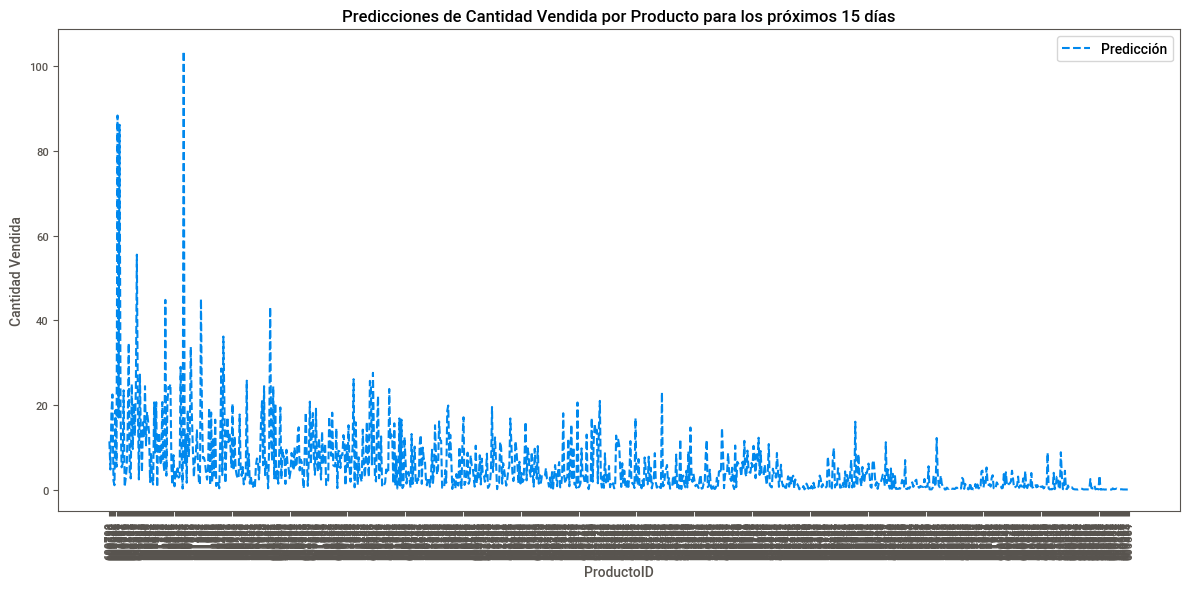

In [185]:
# Crear el gráfico de líneas para las predicciones por producto
plt.figure(figsize=(12, 6))
plt.plot(predicciones_df_boost['ProductoID'], predicciones_df_boost['Prediccion'], label='Predicción', linestyle='--')

# Añadir etiquetas y título
plt.xlabel('ProductoID')
plt.ylabel('Cantidad Vendida')
plt.title('Predicciones de Cantidad Vendida por Producto para los próximos 15 días')
plt.legend()

# Rotar las etiquetas del eje x para una mejor lectura
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [200]:
# Combinamos los dataframes en una sola tabla usando 'Cluster' como clave
rmse_resumen = rmse_df.merge(rmse_df_pca, on='Cluster', how='outer')\
                       .merge(rmse_df_boost, on='Cluster', how='outer')\
                       .merge(rmse_df_best_boost, on='Cluster', how='outer')

# Utilizar 'Cluster' como índice
rmse_resumen.set_index('Cluster', inplace=True)

# Calcular las sumas y promedios de las columnas RMSE
rmse_sumas = rmse_resumen.sum()
rmse_promedios = rmse_resumen.mean()

# Agregar las sumas y promedios al dataframe
rmse_resumen.loc['Suma'] = rmse_sumas
rmse_resumen.loc['Promedio'] = rmse_promedios

In [203]:
rmse_resumen.round(2)

,RMSE_rf,RMSE_rf_pca,RMSE_rf_boosting,RMSE_rf_best_boosting
Cluster,,,,
4,1.23,146.30,1.58,2.28
7,22.18,0.72,11.89,23.01
1,3.04,0.59,5.64,8.89
6,0.93,0.83,1.62,2.77
0,0.95,0.70,1.14,1.54
10,2.05,55.13,3.88,3.45
3,0.59,8.83,0.72,0.93
9,1.09,5.01,1.39,3.22
5,0.66,32.14,0.84,1.01
